# ANÁLSIS DATASET DE DIABETES GESTACIONAL

In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats


from sklearn.model_selection import RandomizedSearchCV, cross_validate
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, confusion_matrix, mean_squared_error
from datetime import date
from datetime import datetime


In [41]:
df = pd.read_excel("Gestational Diabetic Dat Set.xlsx")

In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3525 entries, 0 to 3524
Data columns (total 17 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Case Number                      3525 non-null   int64  
 1   Age                              3525 non-null   int64  
 2   No of Pregnancy                  3525 non-null   int64  
 3   Gestation in previous Pregnancy  3525 non-null   int64  
 4   BMI                              2444 non-null   float64
 5   HDL                              2524 non-null   float64
 6   Family History                   3525 non-null   int64  
 7   unexplained prenetal loss        3525 non-null   int64  
 8   Large Child or Birth Default     3525 non-null   int64  
 9   PCOS                             3525 non-null   int64  
 10  Sys BP                           1820 non-null   float64
 11  Dia BP                           3525 non-null   int64  
 12  OGTT                

In [45]:
df.head()

Case Number  Age  No of Pregnancy  Gestation in previous Pregnancy  BMI  \
0            1   22                2                                1  NaN   
1            2   26                2                                1  NaN   
2            3   29                1                                0  NaN   
3            4   28                2                                1  NaN   
4            5   21                2                                1  NaN   

    HDL  Family History  unexplained prenetal loss  \
0  55.0               0                          0   
1  53.0               0                          0   
2  50.0               0                          0   
3  51.0               0                          0   
4  52.0               0                          0   

   Large Child or Birth Default  PCOS  Sys BP  Dia BP  OGTT  Hemoglobin  \
0                             0     0   102.0      69   NaN        12.0   
1                             0     0   101.0      63   NaN        12.4   
2                             0     0   118.0      79   NaN        14.3   
3                             0     0    99.0      70   NaN        15.0   
4                             0     0   116.0      65   NaN        15.0   

   Sedentary Lifestyle  Prediabetes  Class Label(GDM /Non GDM)  
0                    0            0                          0  
1                    0            0                          0  
2                    0            0                          0  
3                    0            0                          0  
4                    0            0                          0

**Detalles del dataset**
<ul>
    <li>Age: Edad de las pacientes.</li>
    <li>No of pregnancy:Número de embarazos previos.</li>
    <li>Gestation in previous pregnancy: hubo gestación si o no en embarazos previos.</li>
    <li>BMI: índice de masa corporal en inglés.</li>
    <li>HDL: Nivel de colesterol HDL (lipoporteínas de alta  densidad.</li>
    <li>Family History: indica si hay antecendentes de personas con diabetes en la familia 1Sí o 0 No.</li>
    <li>Unexplained prenatal loss: pérdida prenatal inexplicada, 1: Sí o 0: No.</li>
    <li>Large Child or Birth Default: Indica si hubo un bebé grande al nacer o no.</li>
    <li>PCOS: presencia de síndrome de ovario poliquístico.</li>
    <li>Sys BP: Presión arterial sistólica en mmHg.</li>
    <li>Dia BP: presión arterial diastólica en mmHg.</li>
    <li>OGTT: Prueba de tolerancia a la glucosa oral, en mg/dl.</li>
    <li>Hemoglobin: niveles de hemoglobina en g/dl.</li>
    <li>Sedentary Lifestyle: indica si la paciente lleva un ritmo de vida sedentario sí o no.</li>
    <li>Prediabetes: indica si la paciente tenía prediabetes antes dle embarazo.</li>
    <li>Class Label: si la paciente tiene o no GDM.</li>
</ul>

## Preprocesamiento del dataset

Miramos a ver si hay valores nulos y los manejamos. 

In [50]:
nan_counts = df.isnull().sum()

#Mostrar columnas con valores NaN si existen

nan_columns = nan_counts[nan_counts > 0]
print(nan_columns)

BMI       1081
HDL       1001
Sys BP    1705
OGTT       513
dtype: int64


Tenemos 3525 entradas, de las cuales, en las columnas de BMI, HDL, SysBP, OGTT hay datos faltantes. Queremos 
ver que correlaciones hay entre la diabetes gestacional y las variables del dataset, así que primero vamos a rellenar esos datos faltantes. 

Vamos a eliminar las columnas que son irrelevantes: Case Number. 

In [53]:
df = df.drop(columns=["Case Number"])

Puede ser que un modelo lineal no sirva para nuestro caso ya que poseen relaciones no lineales. 

**Vamos a probar con KNN.**

In [57]:
from sklearn.impute import KNNImputer

imputer = KNNImputer(n_neighbors = 1, weights = "uniform")
df_imputed = pd.DataFrame(imputer.fit_transform(df), columns=df.columns)

print(df_imputed)




       Age  No of Pregnancy  Gestation in previous Pregnancy   BMI   HDL  \
0     22.0              2.0                              1.0  22.5  55.0   
1     26.0              2.0                              1.0  24.2  53.0   
2     29.0              1.0                              0.0  21.4  50.0   
3     28.0              2.0                              1.0  19.1  51.0   
4     21.0              2.0                              1.0  19.4  52.0   
...    ...              ...                              ...   ...   ...   
3520  31.0              4.0                              1.0  24.1  32.0   
3521  26.0              3.0                              1.0  34.5  43.0   
3522  35.0              2.0                              2.0  23.6  56.0   
3523  37.0              2.0                              0.0  23.3  28.0   
3524  43.0              2.0                              0.0  28.6  30.0   

      Family History  unexplained prenetal loss  Large Child or Birth Default  \
0     

In [59]:
df_imputed.describe()

Age  No of Pregnancy  Gestation in previous Pregnancy  \
count  3525.000000      3525.000000                      3525.000000   
mean     32.581277         2.076312                         0.960851   
std       6.169107         0.838637                         0.722313   
min      20.000000         1.000000                         0.000000   
25%      28.000000         1.000000                         0.000000   
50%      32.000000         2.000000                         1.000000   
75%      37.000000         3.000000                         1.000000   
max      45.000000         4.000000                         2.000000   

               BMI          HDL  Family History  unexplained prenetal loss  \
count  3525.000000  3525.000000     3525.000000                3525.000000   
mean     26.823915    45.786667        0.498156                   0.364823   
std       5.356104    11.132184        0.500068                   0.481449   
min      13.300000    15.000000        0.000000                   0.000000   
25%      23.400000    40.000000        0.000000                   0.000000   
50%      26.400000    48.000000        0.000000                   0.000000   
75%      29.800000    54.000000        1.000000                   1.000000   
max      45.000000    70.000000        1.000000                   1.000000   

       Large Child or Birth Default         PCOS       Sys BP       Dia BP  \
count                    3525.00000  3525.000000  3525.000000  3525.000000   
mean                        0.35773     0.264681   130.129645    81.538156   
std                         0.47940     0.441226    23.137904    11.379758   
min                         0.00000     0.000000    90.000000    60.000000   
25%                         0.00000     0.000000   116.000000    74.000000   
50%                         0.00000     0.000000   126.000000    81.000000   
75%                         1.00000     1.000000   144.000000    86.000000   
max                         1.00000     1.000000   185.000000   124.000000   

              OGTT   Hemoglobin  Sedentary Lifestyle  Prediabetes  \
count  3525.000000  3525.000000          3525.000000  3525.000000   
mean    164.020709    13.959801             0.449645     0.293050   
std      48.122595     1.863969             0.497529     0.455226   
min      80.000000     8.800000             0.000000     0.000000   
25%     136.000000    12.700000             0.000000     0.000000   
50%     155.000000    14.000000             0.000000     0.000000   
75%     184.000000    15.000000             1.000000     1.000000   
max     403.000000    18.000000             1.000000     1.000000   

       Class Label(GDM /Non GDM)  
count                3525.000000  
mean                    0.389220  
std                     0.487643  
min                     0.000000  
25%                     0.000000  
50%                     0.000000  
75%                     1.000000  
max                     1.000000

In [61]:
true_data = df_imputed.copy() #copia datos imputados
np.random.seed(42)
mask = np.random.choice([True, False], size=df.shape)

validation_data = df_imputed.copy()
validation_data[mask] = np.nan

In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import ParameterGrid

param_grid = {
    "n_neighbors": [1, 2, 3, 5, 10, 20, 30, 50, 70, 100], 
    "weights": ["uniform", "distance"], 
    "metric": ["nan_euclidean"]
}
grid = list(ParameterGrid(param_grid))

#mejor resultado
best_score = float("inf")
best_params = None

for params in grid:
    imputer = KNNImputer(**params)
    imp_data = pd.DataFrame(imputer.fit_transform(validation_data), columns=validation_data.columns)

    score = mean_squared_error(true_data[~mask], imp_data[~mask])
    if score < best_score:
        best_score = score
        best_params = params
print("\nMejores hiperparámetros encontrados:\n")
print(best_params)
print(f"Error cuadrático medio: {best_score}")

Hemos obtenido : {'metric': 'nan_euclidean', 'n_neighbors': 50, 'weights': 'uniform'}
Error cuadrático medio: 53.18349223111328

El error cuadrático medio es muy alto, ya que manejamos escalas del mismo orden de magnitud. 
Vamos a normlizar los datos de entrada

In [63]:
from sklearn.impute import KNNImputer

# Crear e implementar el imputador KNN
imputer = KNNImputer(n_neighbors=50, weights='uniform', metric='nan_euclidean')
imputed_data = imputer.fit_transform(df)

# Convertir el resultado imputado de nuevo a un DataFrame
restored_df = pd.DataFrame(imputed_data, columns=df.columns)


In [65]:
restored_df.describe()

Age  No of Pregnancy  Gestation in previous Pregnancy  \
count  3525.000000      3525.000000                      3525.000000   
mean     32.581277         2.076312                         0.960851   
std       6.169107         0.838637                         0.722313   
min      20.000000         1.000000                         0.000000   
25%      28.000000         1.000000                         0.000000   
50%      32.000000         2.000000                         1.000000   
75%      37.000000         3.000000                         1.000000   
max      45.000000         4.000000                         2.000000   

               BMI          HDL  Family History  unexplained prenetal loss  \
count  3525.000000  3525.000000     3525.000000                3525.000000   
mean     26.863121    45.661974        0.498156                   0.364823   
std       5.116290    10.108882        0.500068                   0.481449   
min      13.300000    15.000000        0.000000                   0.000000   
25%      23.900000    41.480000        0.000000                   0.000000   
50%      26.198000    46.320000        0.000000                   0.000000   
75%      29.600000    53.000000        1.000000                   1.000000   
max      45.000000    70.000000        1.000000                   1.000000   

       Large Child or Birth Default         PCOS       Sys BP       Dia BP  \
count                    3525.00000  3525.000000  3525.000000  3525.000000   
mean                        0.35773     0.264681   127.803217    81.538156   
std                         0.47940     0.441226    20.262097    11.379758   
min                         0.00000     0.000000    90.000000    60.000000   
25%                         0.00000     0.000000   112.000000    74.000000   
50%                         0.00000     0.000000   124.900000    81.000000   
75%                         1.00000     1.000000   138.000000    86.000000   
max                         1.00000     1.000000   185.000000   124.000000   

              OGTT   Hemoglobin  Sedentary Lifestyle  Prediabetes  \
count  3525.000000  3525.000000          3525.000000  3525.000000   
mean    165.397765    13.959801             0.449645     0.293050   
std      46.509857     1.863969             0.497529     0.455226   
min      80.000000     8.800000             0.000000     0.000000   
25%     137.160000    12.700000             0.000000     0.000000   
50%     154.000000    14.000000             0.000000     0.000000   
75%     184.000000    15.000000             1.000000     1.000000   
max     403.000000    18.000000             1.000000     1.000000   

       Class Label(GDM /Non GDM)  
count                3525.000000  
mean                    0.389220  
std                     0.487643  
min                     0.000000  
25%                     0.000000  
50%                     0.000000  
75%                     1.000000  
max                     1.000000

In [67]:
trueData = df_imputed.copy() #copia datos imputados
np.random.seed(42)
mask = np.random.choice([True, False], size=df.shape)

validationData = restored_df.copy()
validationData[mask] = np.nan

imp = KNNImputer(n_neighbors=50, weights='uniform', metric='nan_euclidean')
impData = pd.DataFrame(imputer.fit_transform(validationData), columns = trueData.columns)
mse2 = mean_squared_error(trueData.values[mask], impData.values[mask])
print(mse2)

123.06613631227046


Podemos observar que el dataset normalizado da un error cuadratico medio mayor.

¿Por qué puede dar un MSE mayor?

<ul>
    <li>Introducción de NaN en datos ya imputados: La máscara puede introducir valores faltantes en posiciones donde los datos imputados no son exactos. Esto amplifica el error al comparar los datos imputados dos veces con los datos originales, ya que el imputador podría no recuperar perfectamente los valores iniciales.</li>
    <li>Imprecisión del imputador: El imputador KNN tiene limitaciones, especialmente si las posiciones faltantes están en áreas críticas para calcular distancias entre vecinos.</li>
    <li>Distribución de la máscara: La selección aleatoria de True y False puede generar áreas de datos faltantes difíciles de imputar (e.g., muchos NaN en las mismas filas o columnas).</li>
    
</ul>


**VAMOS A PROBAR CON  IMPUTACIÓN ESTADÍSTICA, KDE**

In [74]:
from scipy.stats import gaussian_kde
def kde_impute(column):
    """
    Imputa valores faltantes en una columna usando Kernel Density Estimation (KDE)
    ARGS: 
        - columna con datos NaN
    RETURNS: 
        - columna con datos imputados
    """
    data = column.copy()
    datanoNan = data.dropna()
    if len(data) > 1: 
        kde = gaussian_kde(datanoNan)
        num_missing = data.isnull().sum()
        imputed_values = kde.resample(num_missing).flatten() # generamos valores para los NaN
        data.loc[data.isnull()] = imputed_values
    return data
    

In [76]:
df_kde = df.copy()
colWithNan = df_kde.columns[df_kde.isnull().any()]
for col in colWithNan:
    df_kde[col] = kde_impute(df_kde[col])
df_kde.describe()

Age  No of Pregnancy  Gestation in previous Pregnancy  \
count  3525.000000      3525.000000                      3525.000000   
mean     32.581277         2.076312                         0.960851   
std       6.169107         0.838637                         0.722313   
min      20.000000         1.000000                         0.000000   
25%      28.000000         1.000000                         0.000000   
50%      32.000000         2.000000                         1.000000   
75%      37.000000         3.000000                         1.000000   
max      45.000000         4.000000                         2.000000   

               BMI          HDL  Family History  unexplained prenetal loss  \
count  3525.000000  3525.000000     3525.000000                3525.000000   
mean     27.833896    46.383951        0.498156                   0.364823   
std       5.880697    10.823266        0.500068                   0.481449   
min      13.050990    11.051064        0.000000                   0.000000   
25%      24.193773    41.306247        0.000000                   0.000000   
50%      27.500000    49.000000        0.000000                   0.000000   
75%      31.053367    54.103785        1.000000                   1.000000   
max      45.962057    71.075311        1.000000                   1.000000   

       Large Child or Birth Default         PCOS       Sys BP       Dia BP  \
count                    3525.00000  3525.000000  3525.000000  3525.000000   
mean                        0.35773     0.264681   135.409186    81.538156   
std                         0.47940     0.441226    22.908813    11.379758   
min                         0.00000     0.000000    81.451425    60.000000   
25%                         0.00000     0.000000   121.000000    74.000000   
50%                         0.00000     0.000000   132.090338    81.000000   
75%                         1.00000     1.000000   153.000000    86.000000   
max                         1.00000     1.000000   192.124164   124.000000   

              OGTT   Hemoglobin  Sedentary Lifestyle  Prediabetes  \
count  3525.000000  3525.000000          3525.000000  3525.000000   
mean    170.898614    13.959801             0.449645     0.293050   
std      48.493910     1.863969             0.497529     0.455226   
min      70.784854     8.800000             0.000000     0.000000   
25%     142.000000    12.700000             0.000000     0.000000   
50%     156.000000    14.000000             0.000000     0.000000   
75%     195.395499    15.000000             1.000000     1.000000   
max     414.142451    18.000000             1.000000     1.000000   

       Class Label(GDM /Non GDM)  
count                3525.000000  
mean                    0.389220  
std                     0.487643  
min                     0.000000  
25%                     0.000000  
50%                     0.000000  
75%                     1.000000  
max                     1.000000

## COMPARACIÓN KNN VS KDE

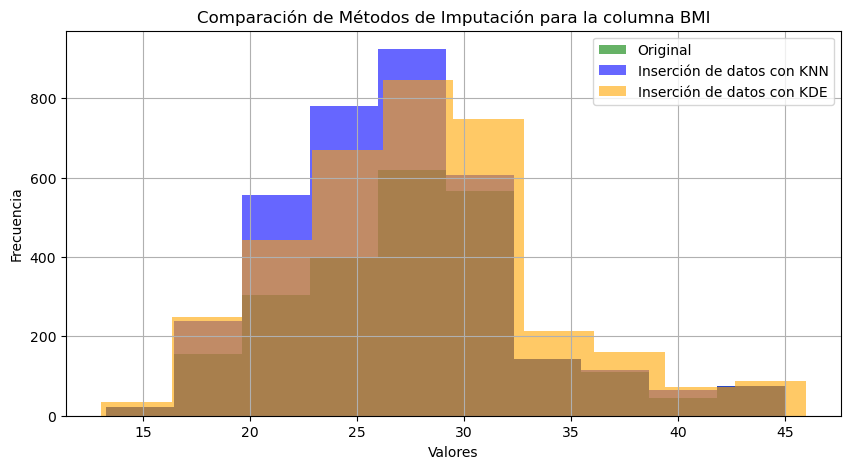

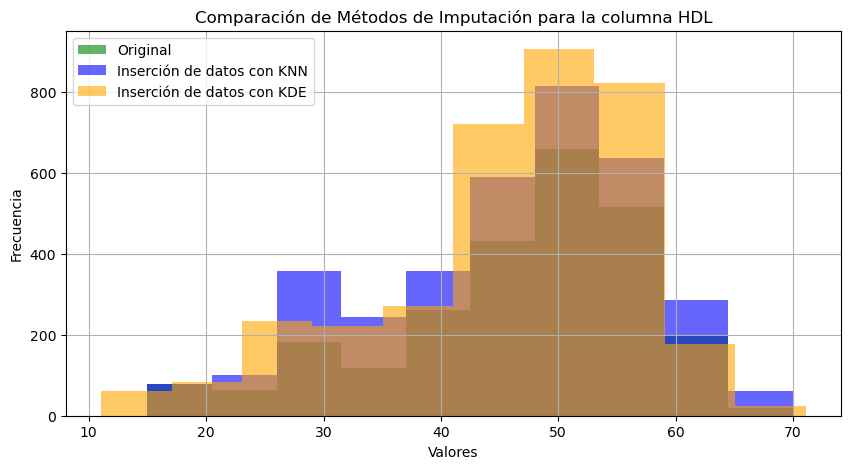

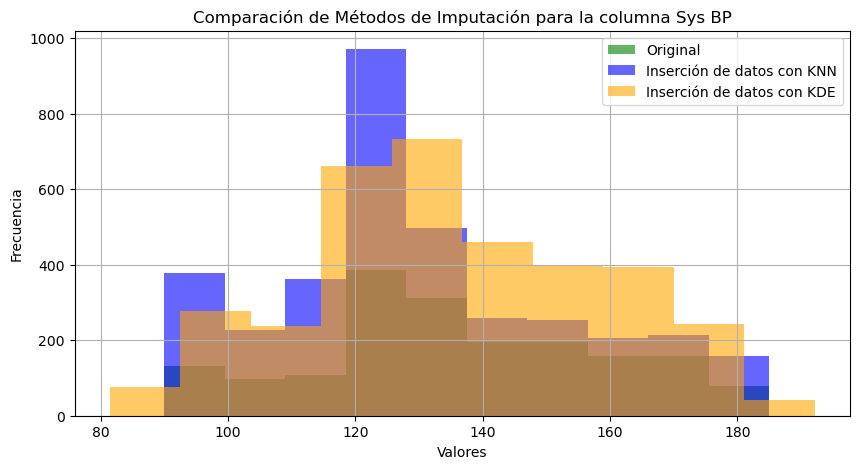

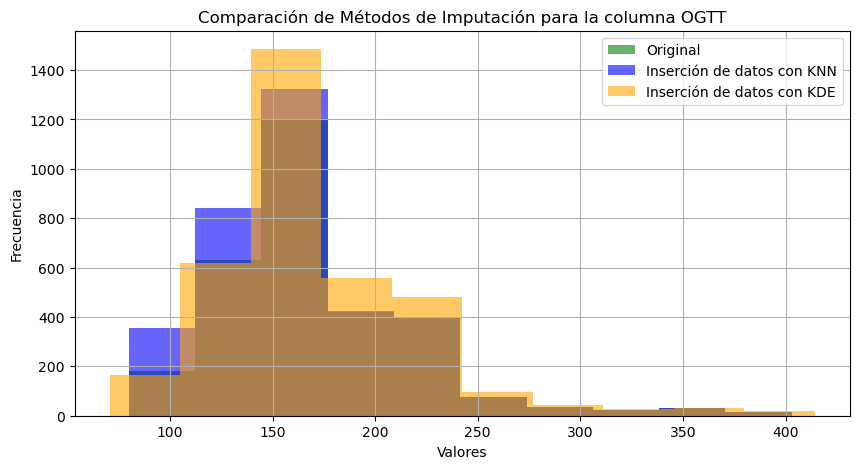

In [78]:
col_missing = ['BMI', 'HDL', 'Sys BP', 'OGTT']
for col in col_missing:
    plt.figure(figsize=(10,5))
    plt.hist(df[col], bins = 10, alpha=0.6, label = 'Original', color = 'green')
    plt.hist(df_imputed[col], bins = 10, alpha=0.6, label = 'Inserción de datos con KNN', color = 'blue')
    plt.hist(df_kde[col], bins = 10, alpha=0.6, label = 'Inserción de datos con KDE', color = 'orange')
    plt.title(f'Comparación de Métodos de Imputación para la columna {col}')
    plt.xlabel('Valores')
    plt.ylabel('Frecuencia')
    plt.legend()
    plt.grid(True)
    plt.show()

A simple vista tenemos una desviación parecida en la inserción de datos, aunque parece que la opción usando KDE se ajusta mejor para ciertos casos, 
así, vamos a usar  el dataset insertado con KDE. 

In [80]:
df_kde.to_csv("Gestational-Diabetes-COMPLETE.csv", index=False)

## MANEJO DE OUTLIERS

In [82]:
Q1= df_kde.quantile(0.25)
Q3 = df_kde.quantile(0.75)

IQR = Q3 - Q1
outliers = (df_kde < (Q1 - 1.5*IQR)) | (df_kde > (Q3 + 1.5*IQR))
print(outliers.sum())

Age                                  0
No of Pregnancy                      0
Gestation in previous Pregnancy      0
BMI                                129
HDL                                114
Family History                       0
unexplained prenetal loss            0
Large Child or Birth Default         0
PCOS                                 0
Sys BP                               0
Dia BP                             163
OGTT                               120
Hemoglobin                           6
Sedentary Lifestyle                  0
Prediabetes                          0
Class Label(GDM /Non GDM)            0
dtype: int64


Vemos que tenemos outliers en las columnas que hemos insertado los valores, cosa que era de esperar ya que el error cuadrático medio era bastante alto.
Como es un bajo númeor de outleirs, vamos a eliminarlos.

In [84]:
df_kde = df_kde[~((df_kde < (Q1 - 1.5 * IQR)) | (df_kde > (Q3 + 1.5 * IQR))).any(axis=1)]
outliers = (df_kde < (Q1 - 1.5*IQR)) | (df_kde > (Q3 + 1.5*IQR))
print(outliers.sum())

Age                                0
No of Pregnancy                    0
Gestation in previous Pregnancy    0
BMI                                0
HDL                                0
Family History                     0
unexplained prenetal loss          0
Large Child or Birth Default       0
PCOS                               0
Sys BP                             0
Dia BP                             0
OGTT                               0
Hemoglobin                         0
Sedentary Lifestyle                0
Prediabetes                        0
Class Label(GDM /Non GDM)          0
dtype: int64


**Vamos a revisar la distribución de la clase GDM**

Class Label(GDM /Non GDM)
0    2153
1    1372
Name: count, dtype: int64


Text(0, 0.5, 'Frecuencia')

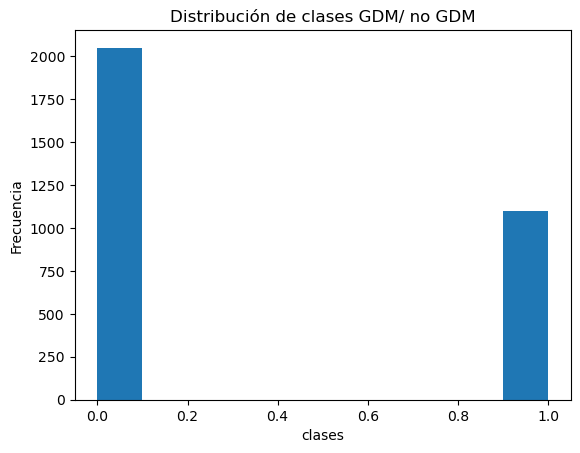

In [86]:
print(df['Class Label(GDM /Non GDM)'].value_counts())
plt.hist(df_kde['Class Label(GDM /Non GDM)'])
plt.title('Distribución de clases GDM/ no GDM')
plt.xlabel('clases')
plt.ylabel('Frecuencia')

**Relación de variables contimuasy numéricas con GDM**


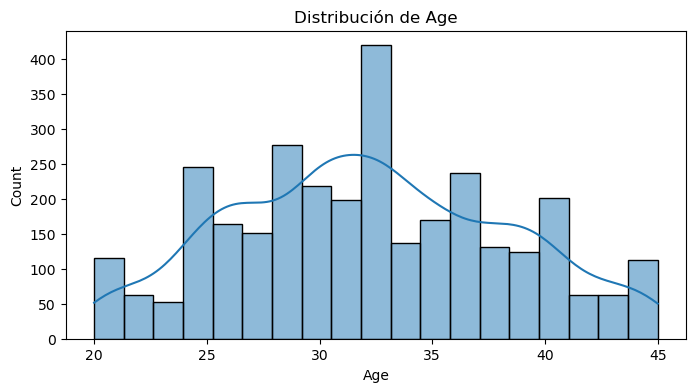

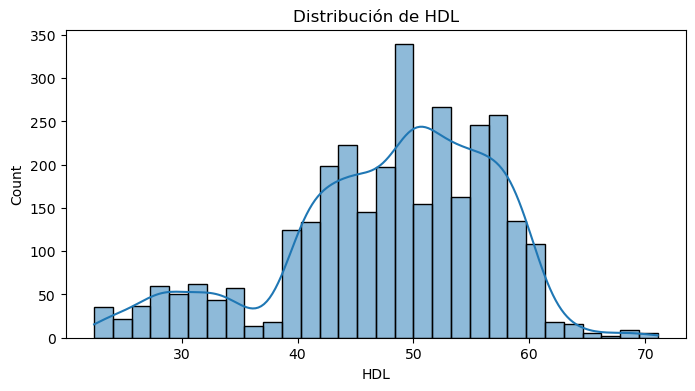

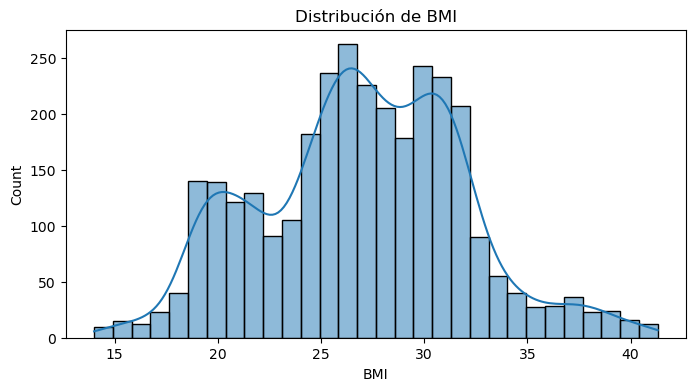

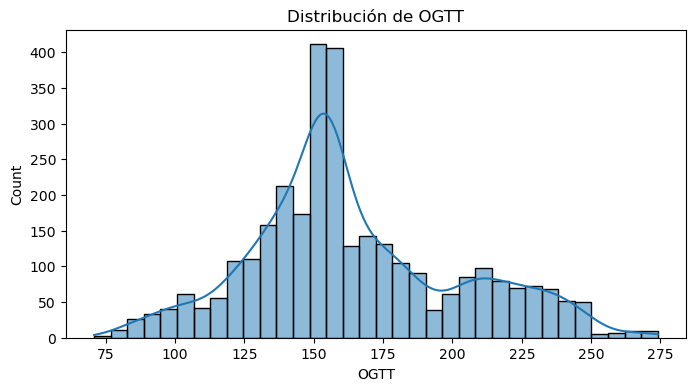

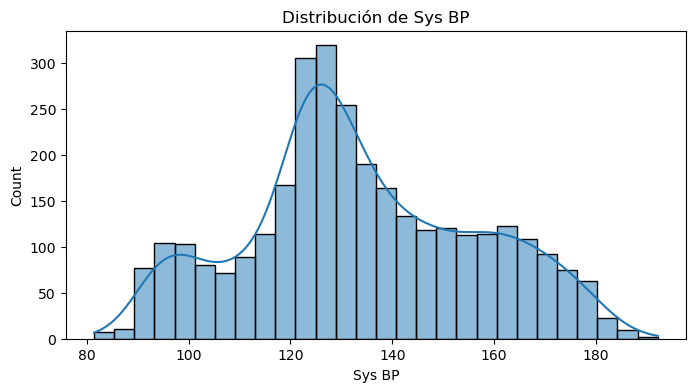

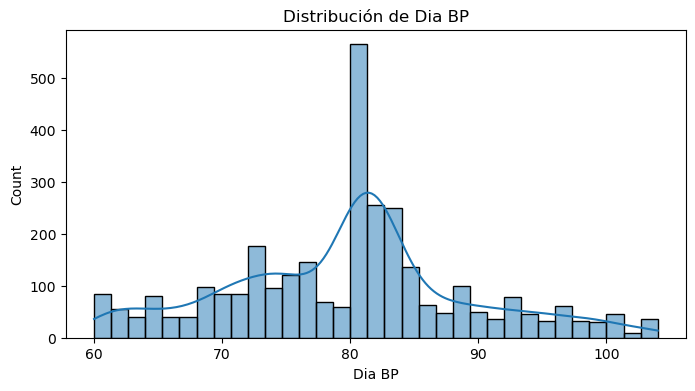

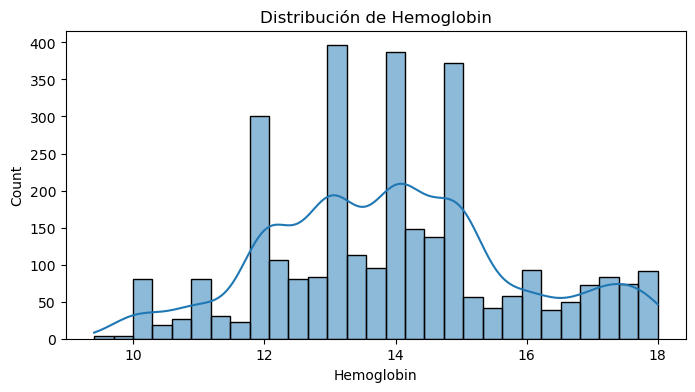

In [88]:
numeric_vars = ['Age', 'HDL', 'BMI', 'OGTT', 'Sys BP', 'Dia BP', 'Hemoglobin']
for var in numeric_vars:
    plt.figure(figsize=(8,4))
    sns.histplot(df_kde[var], kde=True)
    plt.title(f'Distribución de {var}')
    plt.show()

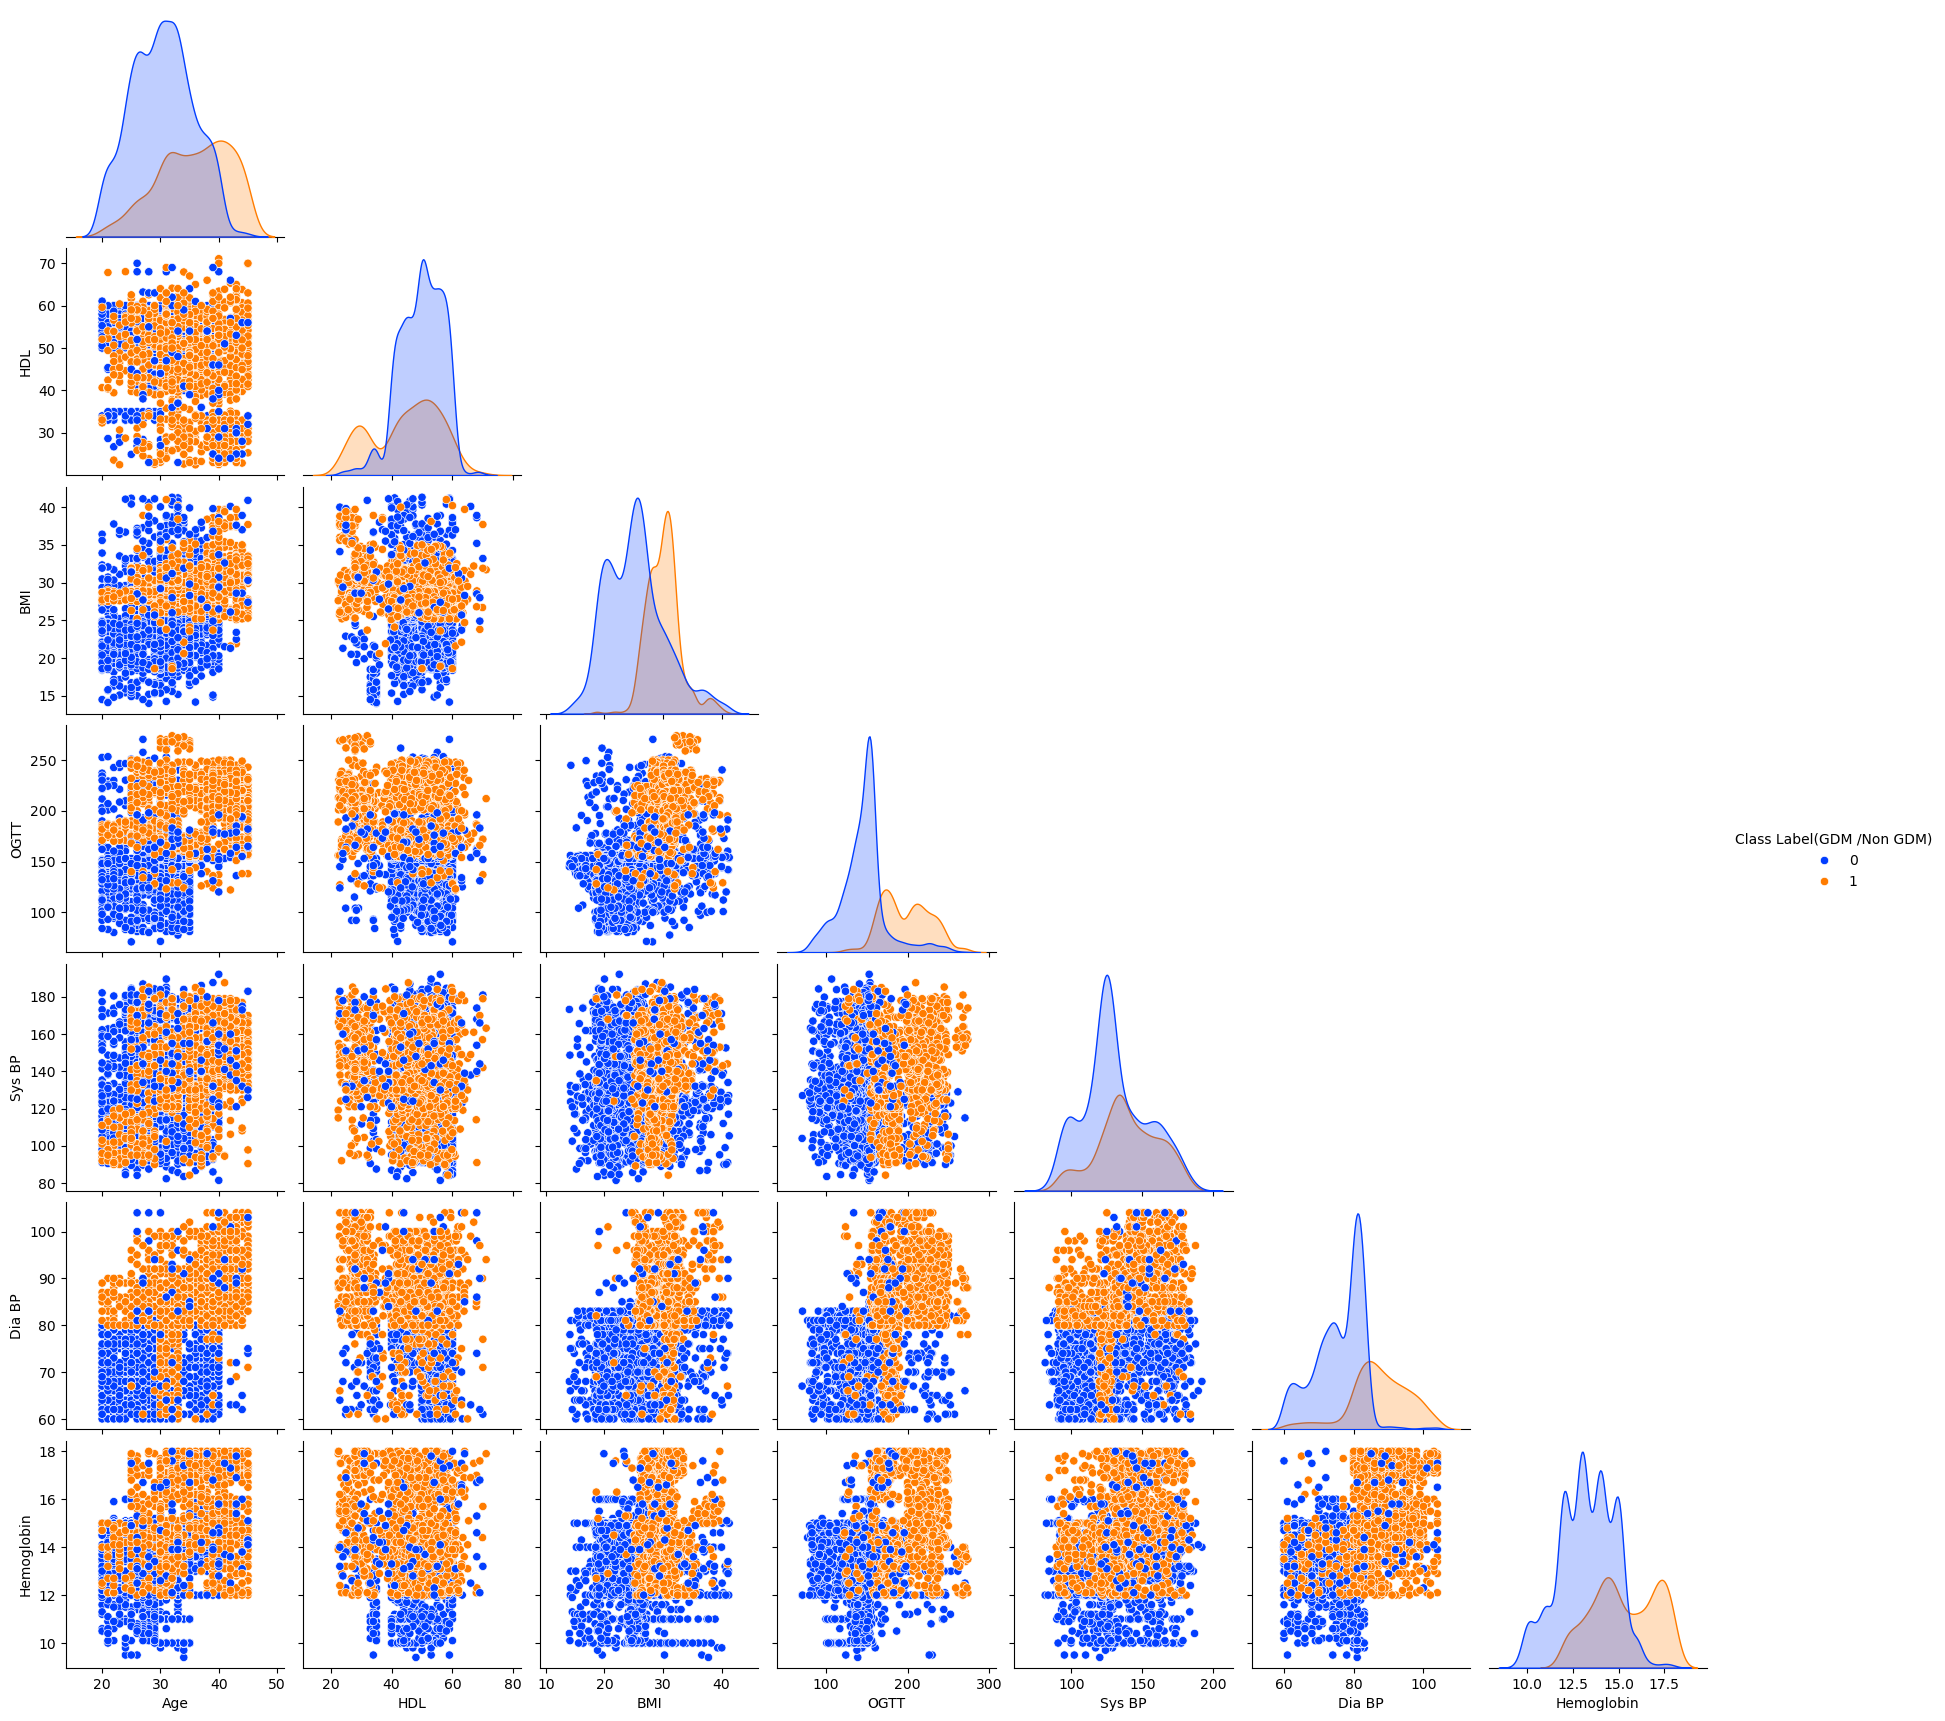

In [90]:
variables = ['Age', 'HDL', 'BMI', 'OGTT', 'Sys BP', 'Dia BP', 'Hemoglobin', 'Class Label(GDM /Non GDM)' ]
sns.pairplot(df_kde[variables], hue='Class Label(GDM /Non GDM)', diag_kind='kde', corner=True, palette='bright')
plt.show()

De aquí sacamos las siguientes conclusiones: 
<ul>
    <li>HDL: la distribución univariada muestra que las pacientes con GDM tienentendencia a tener bajo HDl. Esto apoya la hipótesis 
    de que niveles abajos de HDL están relacionados con un mayor riesgi de diabetes gestacional</li>
    <li>BMI: Las pacienytes con GDMtienen tendencia a tener un BMI alto, con una mayor densaidad 
    en valores superiores a 30, quiere decir que esta variable es un fcactor de riesgo.</li>
    <li>OGTT: Como cabe esperar, los pacientes con GDM tienen valores altos de OGTT, ya que esta prueba mide directamente la glucosa.</li>
    <li>Hemoglobin: la hemoglobina muestra una diferencia de clases, siendo alta en pacientes con diabetes gestacional. La glucosa se une a la hemoglobina en su presencia, cuanto mayor sea el nivel de hemoglobina, menor será el control de la glucosa y mayor riesgo de desarrollar glucosa. </li>
    <li>OGTT y BMI: Las paciente con mayor BMI tienden a tener mayor OGTT, especialemnte las diagnosticadas con diabetes, esto respalda la relación entre la obesidad y tolerancia a glucosa.</li>
    <li>BMI y HDL: a medida que aumenta el BMI, los niveles de HDLtienden a disminuuir, este patrón es más evidente entre diagnosticadas con GDM, reforzando el vínculo entre obesidad, dislipidemia (alteración niveles de grasas en sangre) y diabetes.</li>
    
</ul>

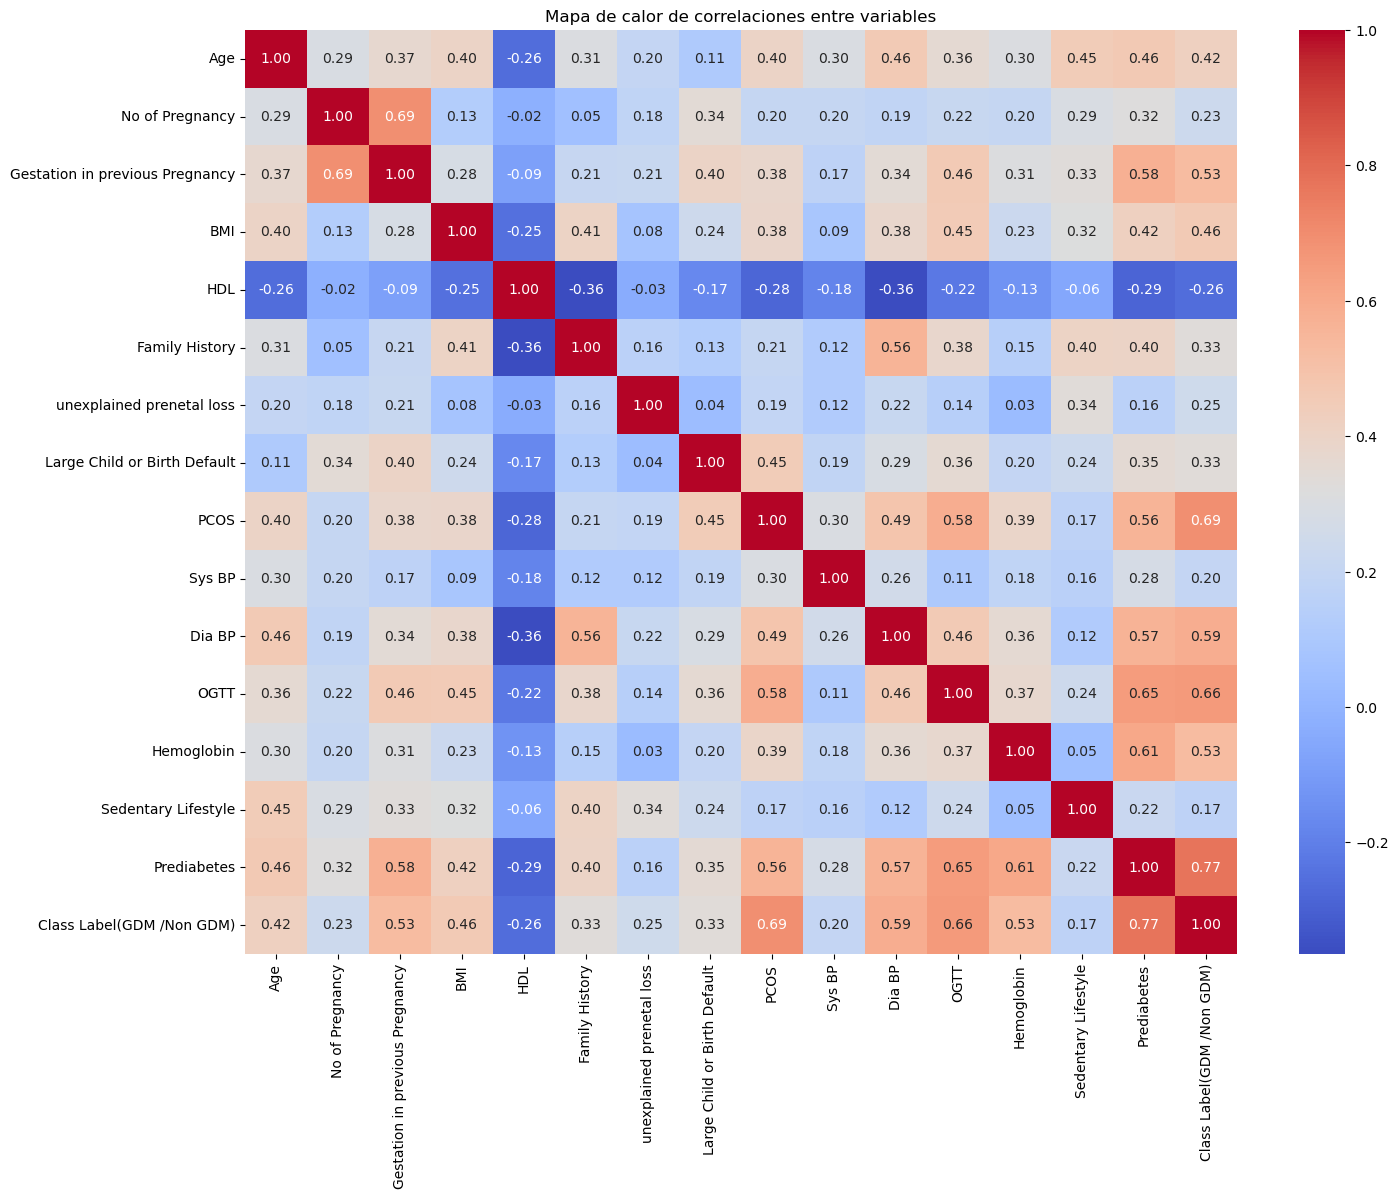

In [93]:
plt.figure(figsize=(16,12))
sns.heatmap(df_kde.corr(), annot=True, fmt=".2f", cmap="coolwarm", cbar = True)

plt.title("Mapa de calor de correlaciones entre variables")
plt.show()

Relaciones importantes con la clase GDM/ Non GDM:
<ul>
    <li>Prediabetes (r= 0.74): es un predictor directo y confirma que las pacientes con prediabetes tienen alto riesgo de desarrollar GDM-</li>
    <li> PCOS (Síndorme de Ovario poliquístico) (r = 0.69): es una condición importante asociada con el desarollo de GDM, probablemente debido a desbalances hormonales</li>
    <li>OGTT (r=0.6): es muy relevante ya quye mide la capacidad de metabolizar la glucossa.</li>
    <li>Dia BP (r=0.58): Una presión diastólica elevada tiene correlación con la GDM, también, la gente con diabetes suele tener hipertensión.</li>
    <li>Hemoglobin: (r=0.48): niveles altos de hemoglobina pueden estar relacionados con complicaciones  metbólicas que aumentan el riesgo de diabetes.</li>
    <li>BMI (r=0.48): confirma la relación entre obesidad y riesgo de GDM</li>
</ul>
Variables menos correlacionadas con la clase objetivo:
<ul>
    <li>Sys BP: tiene una r= 0.27; es relevante aun así.</li>
    <li>HDL (r=-0.36): tiene una correlación negativa moderada. Un HDL bajo sigues siendo un factor importante.</li>
    <li>Sedentary Lifestyle(r=0.13): aunque un estilo de vida sedentario podría contribuir indirectamente, su impacto directo parece ser menor a lo esperado.</li>
</ul>

De este análisis, sacamos que las variables clae para nuestro modelo son: Prediabetes, PCOS, Dia BP, HDL y BMI. 

# ALGORITMO DE PREDICCIÓN 

In [462]:
import pandas as pd
import numpy as np
import pickle

from sklearn.model_selection import RandomizedSearchCV, cross_validate
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, confusion_matrix, mean_squared_error
import seaborn as sns
import scipy.stats as st

<p>Vamos a usar le modelo que aparece en el estudio <a href= "https://www.techscience.com/cmc/v69n3/44131."> "Ensemble classifier technique to predict gestational diabetes mellitus (gdm)"</a>, en el obtienen una precision del 96,87%.</p>

Previo a entrenar el modelo, hacen agrupación jerárquica de datos, así podemos comprobar relaciones complejas y eliminar valores atípicos. 


In [477]:
data = pd.read_csv('Gestational-Diabetes-COMPLETE.csv')
data= data.drop(columns=['Case Number'])

In [100]:
data.head()

Age  No of Pregnancy  Gestation in previous Pregnancy   BMI   HDL  \
1081   30                3                                1  25.1  40.0   
1082   33                3                                1  25.8  44.0   
1083   30                3                                1  25.1  40.0   
1084   30                3                                1  26.5  44.0   
1085   33                3                                1  26.4  42.0   

      Family History  unexplained prenetal loss  Large Child or Birth Default  \
1081               1                          0                             1   
1082               1                          0                             1   
1083               1                          0                             1   
1084               1                          0                             1   
1085               1                          0                             1   

      PCOS  Sys BP  Dia BP   OGTT  Hemoglobin  Sedentary Lifestyle  \
1081     0     NaN      80  153.0        15.0                    1   
1082     0     NaN      80  155.0        12.0                    1   
1083     0     NaN      81  153.0        14.0                    1   
1084     0     NaN      80  155.0        13.0                    1   
1085     0     NaN      83  153.0        13.0                    1   

      Prediabetes  Class Label(GDM /Non GDM)  
1081            0                          0  
1082            0                          0  
1083            0                          0  
1084            0                          0  
1085            0                          0

**Estandarizamos datos**

In [602]:
from sklearn.preprocessing import StandardScaler
cols = ['Age', 'BMI', 'Sys BP', 'Dia BP', 'OGTT']
scaler = StandardScaler()

data_scaled = data.copy()
data_scaled[cols]=scaler.fit_transform(data[cols])

In [618]:
columns_to_drop = [
    "No of Pregnancy",
    "Gestation in previous Pregnancy",
    "Family History",
    "Large Child or Birth Default",
    "unexplained prenetal loss",
    "PCOS",
    "HDL",
    "Hemoglobin",
    "Sedentary Lifestyle"
]

data_cleaned = data_scaled.drop(columns=columns_to_drop, errors='ignore')

In [620]:
data_cleaned.describe()

Age           BMI        Sys BP        Dia BP          OGTT  \
count  3.143000e+03  3.143000e+03  3.143000e+03  3.143000e+03  3.143000e+03   
mean   3.436287e-16 -1.446858e-16  9.042860e-17  6.510859e-16 -5.787430e-16   
std    1.000159e+00  1.000159e+00  1.000159e+00  1.000159e+00  1.000159e+00   
min   -2.010361e+00 -2.666006e+00 -2.356728e+00 -2.097107e+00 -2.490561e+00   
25%   -6.948156e-01 -6.491700e-01 -5.949822e-01 -6.114298e-01 -6.230450e-01   
50%   -3.704288e-02  2.900488e-02 -1.401783e-01  1.314090e-01 -2.208452e-01   
75%    7.851730e-01  6.962178e-01  7.135405e-01  4.497685e-01  5.308599e-01   
max    2.100718e+00  2.956894e+00  2.574665e+00  2.572165e+00  2.835873e+00   

       Prediabetes  Class Label(GDM /Non GDM)  
count  3143.000000                3143.000000  
mean      0.266624                   0.346484  
std       0.442265                   0.475925  
min       0.000000                   0.000000  
25%       0.000000                   0.000000  
50%       0.000000                   0.000000  
75%       1.000000                   1.000000  
max       1.000000                   1.000000

Una media cercana a cero y una desviación estándar cercaa a 1 indica que los datos están escalados de manera uniforme. Los máximos y mínimos indican la distancia a la que estaban los datos originales del promedio (muy encima o muy debajo). 

Ahora que las columnas están estandarizadas, podemos aplicar el clustering jerárquico, el ovjetivo es identificar aquellos puntos que no se ajusten bien a ningún grupo o cluster, y marcarlos como outliers.

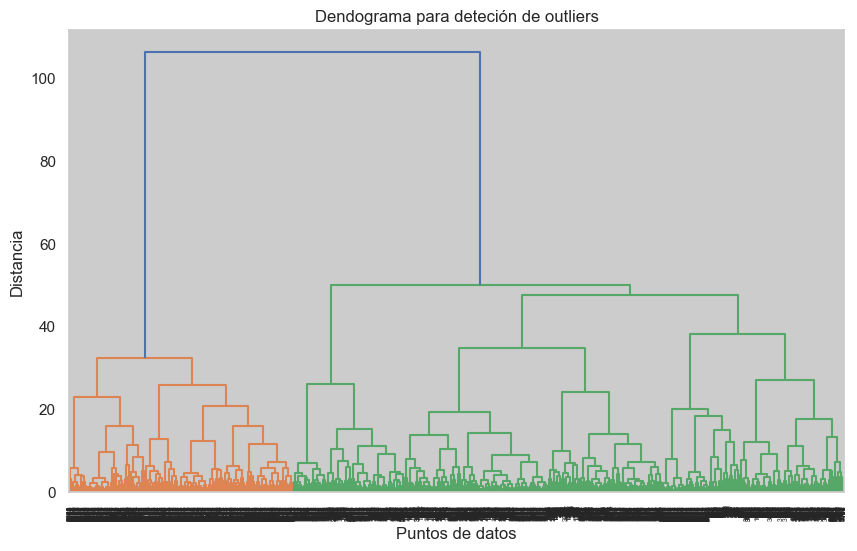

In [626]:
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
Z = linkage(data_cleaned, method = 'ward') #método ward minimiza la varianza dentro de los clusters

plt.figure(figsize=(10,6))
dendrogram(Z)
plt.title("Dendograma para deteción de outliers")
plt.xlabel("Puntos de datos")
plt.ylabel("Distancia")
plt.show()


In [630]:
#Formamos clusters
threshold = 30
clusters = fcluster(Z, t=threshold, criterion='distance')

#Agregar clusters a los datos
data_cleaned['Cluster'] = clusters

#identificamis clusters pequeños
cluster_sizes= data_cleaned['Cluster'].value_counts()
outlier_clusters=cluster_sizes[cluster_sizes ==1].index #cluster con un solo punto

#Identificar datos con outliers
outliers = data_cleaned[data_cleaned['Cluster'].isin(outlier_clusters)]
print(f"Se identificaron {len(outliers)} outliers")

Se identificaron 0 outliers


In [515]:
#Formamos clusters
threshold = 30
clusters = fcluster(Z, t=threshold, criterion='distance')

#Agregar clusters a los datos
data_scaled['Cluster'] = clusters

#identificamis clusters pequeños
cluster_sizes= data_scaled['Cluster'].value_counts()
outlier_clusters=cluster_sizes[cluster_sizes ==1].index #cluster con un solo punto

#Identificar datos con outliers
outliers = data_scaled[data_scaled['Cluster'].isin(outlier_clusters)]
print(f"Se identificaron {len(outliers)} outliers")

Se identificaron 0 outliers


In [657]:
# Analizar los tamaños de los clusters
cluster_sizes = data_cleaned['Cluster'].value_counts()
print(cluster_sizes)

# Relación entre clusters y la etiqueta objetivo
data_cleaned['Target'] = data['Class Label(GDM /Non GDM)']  # Añadir la variable objetivo
cluster_analysis = data_cleaned.groupby(['Cluster', 'Target']).size().unstack()
print(cluster_analysis)


Cluster
2    601
4    583
5    464
3    448
7    425
6    313
1    309
Name: count, dtype: int64
Target       0      1
Cluster              
1         31.0  278.0
2          3.0  598.0
3        438.0   10.0
4        582.0    1.0
5        464.0    NaN
6        125.0  188.0
7        411.0   14.0


In [659]:
cluster_stats = data_cleaned.groupby('Cluster').mean()
print(cluster_stats)

              Age       BMI    Sys BP    Dia BP      OGTT  Prediabetes  \
Cluster                                                                  
1        0.653725  0.346573  0.421050  0.992044  0.071064     0.679612   
2        0.922802  0.870790  0.569577  1.130277  1.505914     0.993344   
3       -0.307200 -0.652542  1.222603 -0.407718 -0.594077     0.017857   
4       -0.120534 -0.567664 -0.591522 -0.003289 -0.636762     0.000000   
5       -1.209409 -0.835634 -0.751667 -1.017841 -0.790356     0.000000   
6       -0.676427  0.328036 -0.885150 -0.301207  0.808001     0.000000   
7        0.527481  0.653906 -0.116385 -0.552252 -0.413679     0.054118   

         Class Label(GDM /Non GDM)    Target  
Cluster                                       
1                         0.899676  0.899676  
2                         0.995008  0.995008  
3                         0.022321  0.022321  
4                         0.001715  0.001715  
5                         0.000000  0.000000  
6   

In [661]:
#1. Preprocesamiento: dividimos datos en entrenamiento y prueba
X = data_cleaned.drop(columns=['Cluster', 'Target'], errors = 'ignore') #variables predictoras
y = data_cleaned['Target'] #variable objetivo, class GDM / non GDM

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#2. Construimos autoencoder
input_dim = X_train.shape[1] # Número de características
encoding_dim = 4 #regla dimensionalidad de la miatd de neruonas del nº de features que tenemos.

#Modelo auto encoder:
input_layer = Input(shape=(input_dim, ))
encoded = Dense(16, activation='relu')(input_layer) #primera capa oculta
encoded = Dense(encoding_dim, activation='relu')(encoded) #capa comprimida
decoded = Dense(16, activation='relu')(encoded) #reconstrucción
decoded = Dense(input_dim, activation='sigmoid')(decoded)

#Autoencoder completo
autoencoder = Model(inputs=input_layer, outputs=decoded)
autoencoder.compile(optimizer='adam', loss='mse')

#3. Entrenamos modelo
history = autoencoder.fit(
    X_train, X_train, 
    epochs=50, 
    batch_size=32, 
    validation_split=0.2, 
    verbose = 1
)

#4. Extraer características comprimidas

encoder = Model(inputs=input_layer, outputs=encoded) #Modelo solo de la parte codificada
X_train_encoded= encoder.predict(X_train) #Representaciones comprimidas del conjunto de entrenamiento
X_test_encoded = encoder.predict(X_test) #Representaciones comprimidas del conjunto de prueba

#5. entrenar clasificador con las características reducidas
classifier = RandomForestClassifier(random_state=42)
classifier.fit(X_train_encoded, y_train)

#Prediccion y evaluacion
y_pred = classifier.predict(X_test_encoded)
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Epoch 1/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.9583 - val_loss: 0.9049
Epoch 2/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.8642 - val_loss: 0.7944
Epoch 3/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.7594 - val_loss: 0.6381
Epoch 4/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.5948 - val_loss: 0.5567
Epoch 5/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.5460 - val_loss: 0.5235
Epoch 6/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5076 - val_loss: 0.5074
Epoch 7/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.5007 - val_loss: 0.5001
Epoch 8/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.4911 - val_loss: 0.4945
Epoch 9/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.4778 - val_loss: 0.4897
Epoch 10/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4714 - val_loss: 0.4845
Epoch 11/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.4678 - val_loss: 0.4785
Epoch 12/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.4496 - val_lo

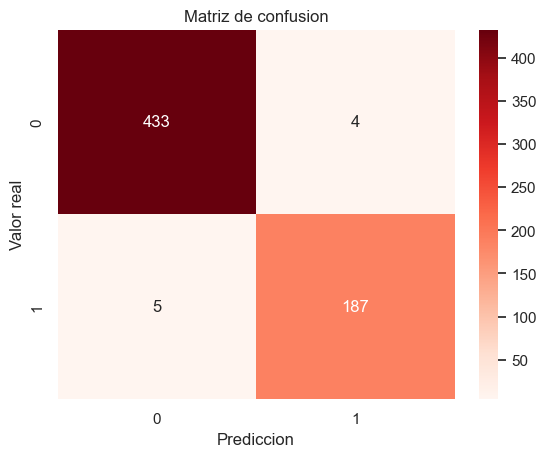

In [640]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt= 'd', cmap='Reds')
plt.xlabel('Prediccion')
plt.ylabel('Valor real')
plt.title('Matriz de confusion')
plt.show()

In [663]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(classifier, X_train_encoded, y_train, cv=5)
print(f"Cross-validation scores: {scores}")
print(f"Mean accuracy: {scores.mean()}")

Cross-validation scores: [0.9860835  0.99602386 0.98807157 0.99403579 0.98804781]
Mean accuracy: 0.9904525040989125


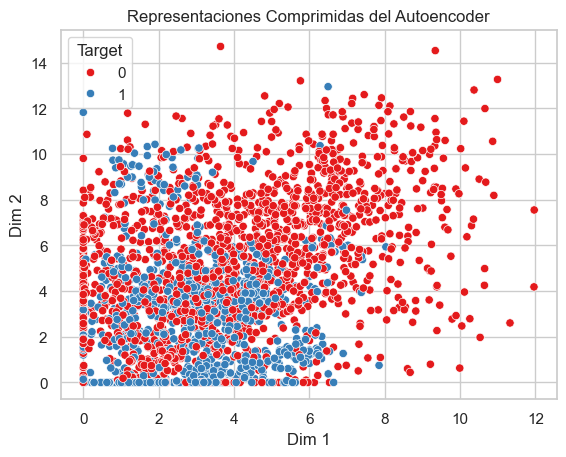

In [665]:
sns.scatterplot(x=X_train_encoded[:,0], y=X_train_encoded[:,1], hue=y_train, palette='Set1')
plt.title('Representaciones Comprimidas del Autoencoder')
plt.xlabel('Dim 1')
plt.ylabel('Dim 2')
plt.show()

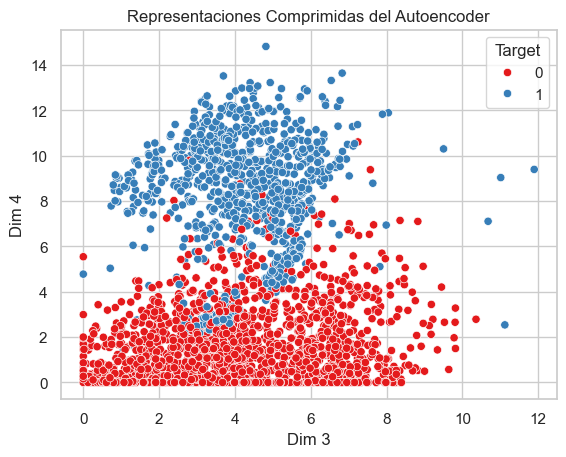

In [667]:
sns.scatterplot(x=X_train_encoded[:,2], y=X_train_encoded[:,3], hue=y_train, palette='Set1')
plt.title('Representaciones Comprimidas del Autoencoder')
plt.xlabel('Dim 3')
plt.ylabel('Dim 4')
plt.show()

In [677]:
encoded_layer_weights = autoencoder.layers[1].get_weights()[0]
encoded_weights = pd.DataFrame(
    encoded_layer_weights, 
    index=X.columns,
    columns=[f"Dim {i+1}" for i in range(encoded_layer_weights.shape[1])]
)
print(encoded_weights)

                              Dim 1     Dim 2     Dim 3     Dim 4     Dim 5  \
Age                       -0.421979 -0.118158  0.232795  0.325436  0.448959   
BMI                       -0.304585 -0.055769 -0.172638 -0.875579 -0.282430   
Sys BP                     0.565355 -0.343918  0.006151 -0.527132 -0.094655   
Dia BP                    -0.267842 -0.342874 -0.206611 -0.224654  0.982534   
OGTT                      -0.511391  0.054880 -0.468373  0.074712  0.050512   
Prediabetes                0.065803 -0.382904  0.024424  0.252576  0.384271   
Class Label(GDM /Non GDM) -0.356333 -0.278770  0.544433 -0.355118  1.032087   

                              Dim 6     Dim 7     Dim 8     Dim 9    Dim 10  \
Age                        0.002841 -0.274349 -0.218777  1.156675 -0.458726   
BMI                       -0.230852 -0.157793 -0.988659 -1.137807 -0.748197   
Sys BP                    -0.076001  1.107108 -0.308895  0.198466 -0.447597   
Dia BP                     0.017375  0.063374  0.13

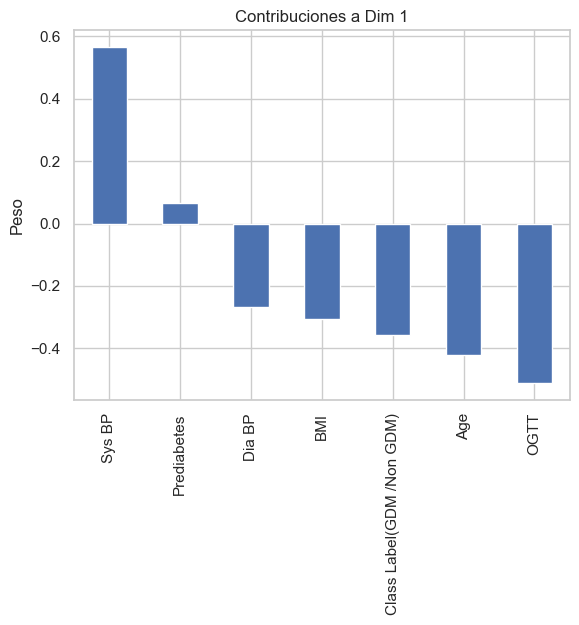

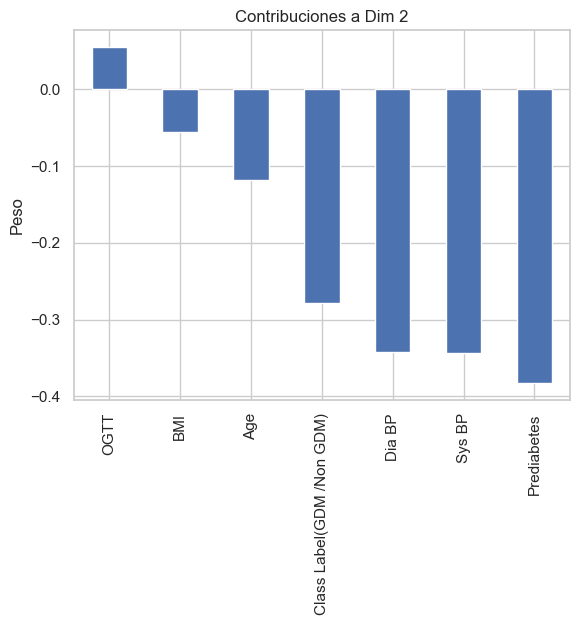

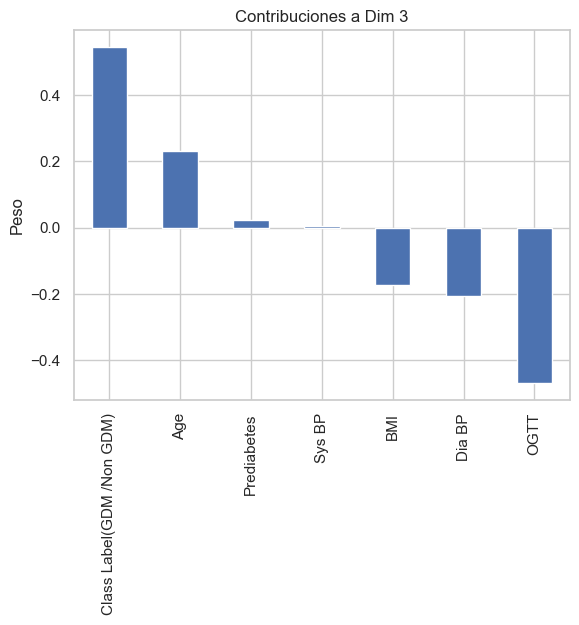

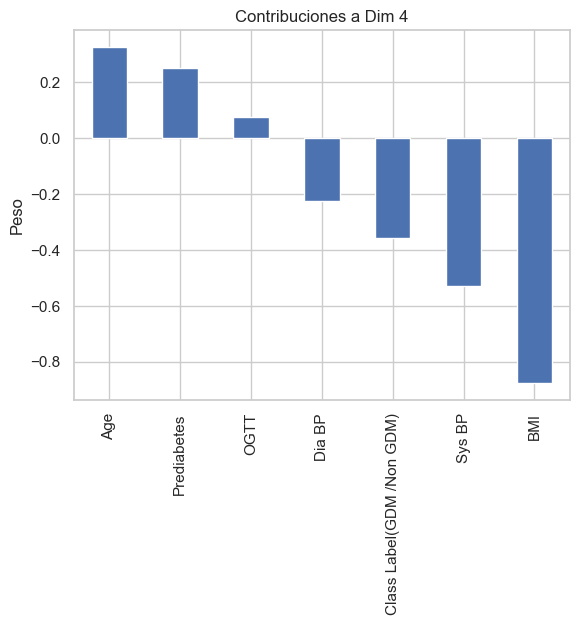

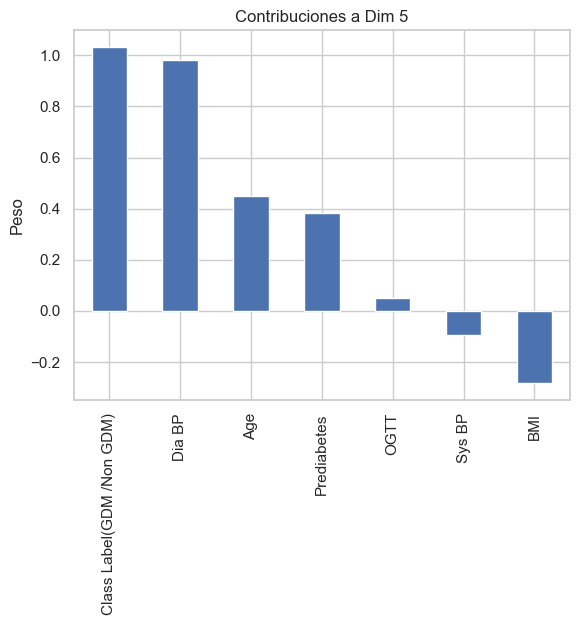

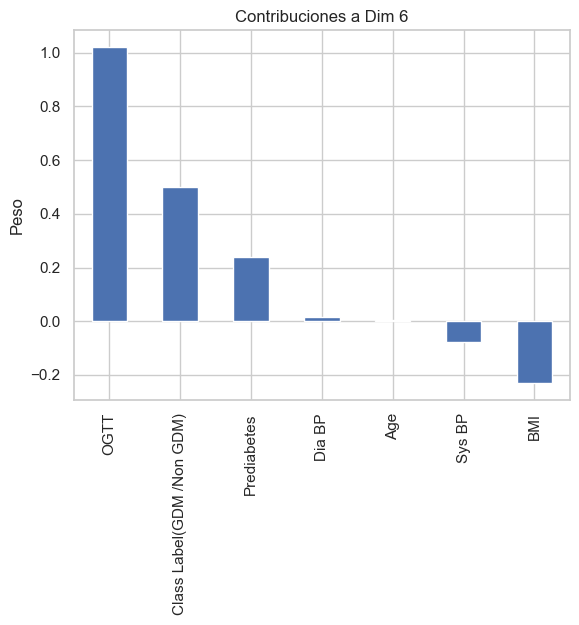

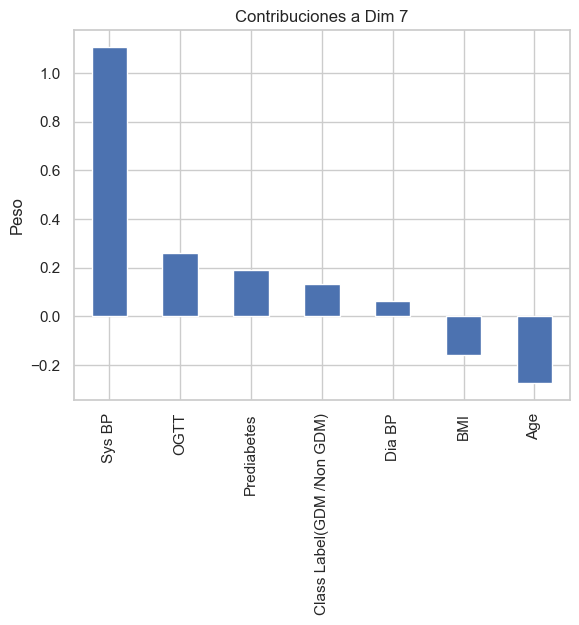

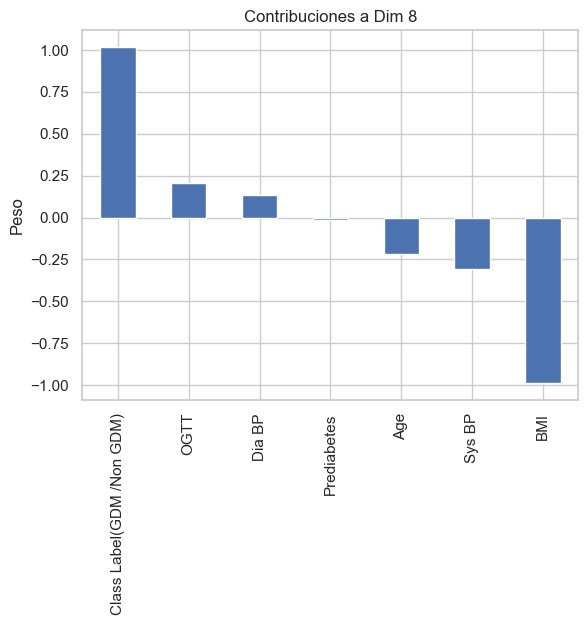

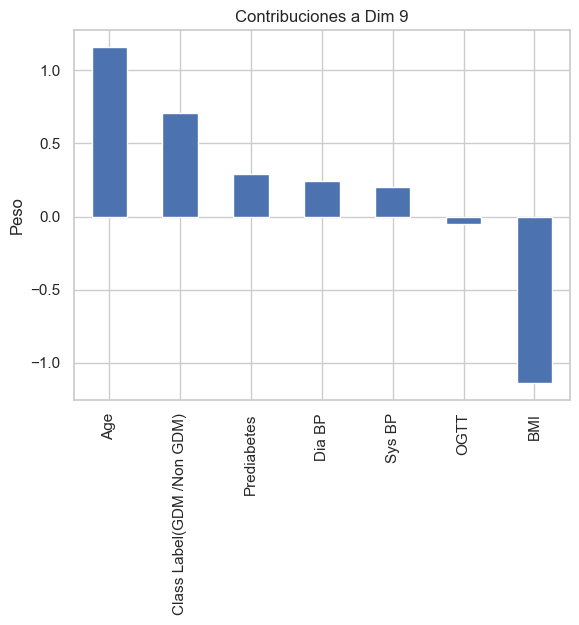

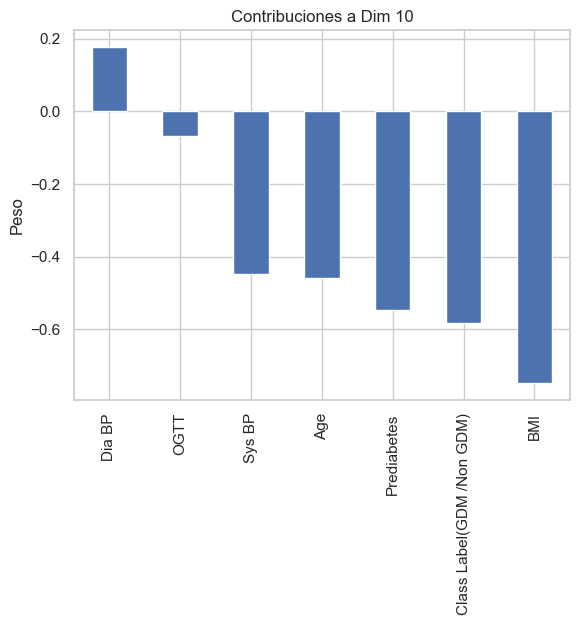

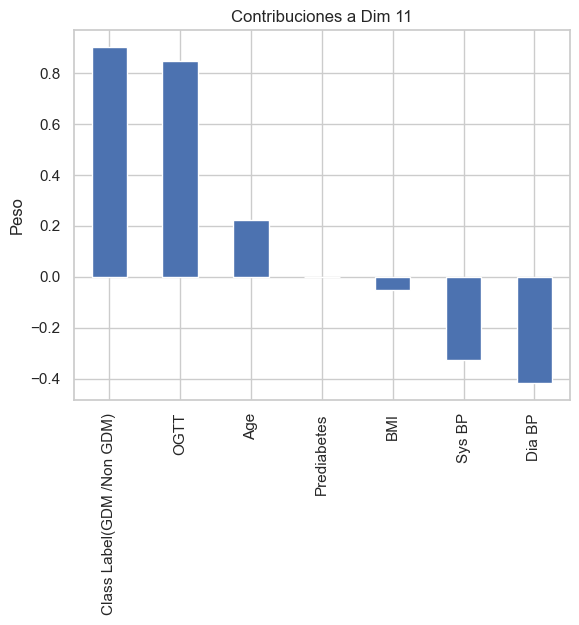

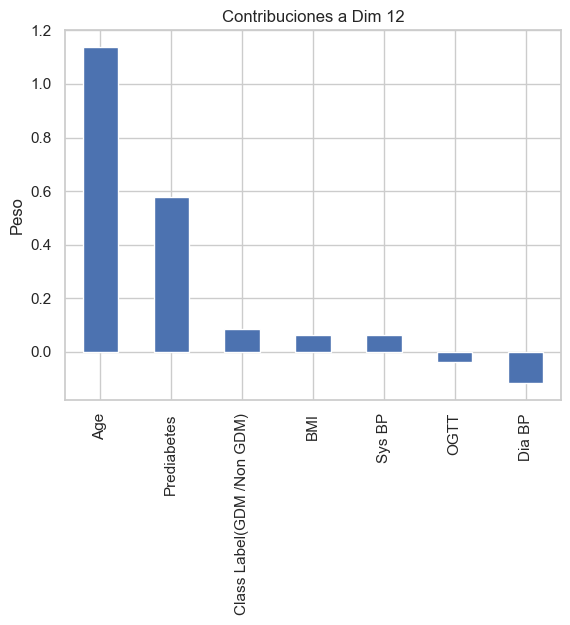

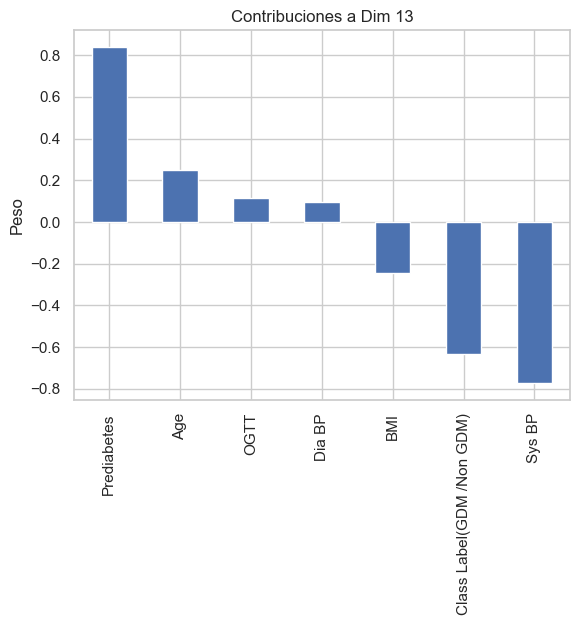

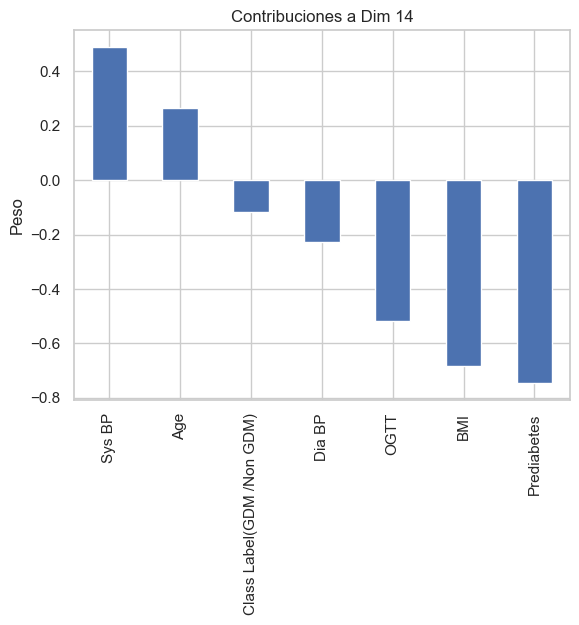

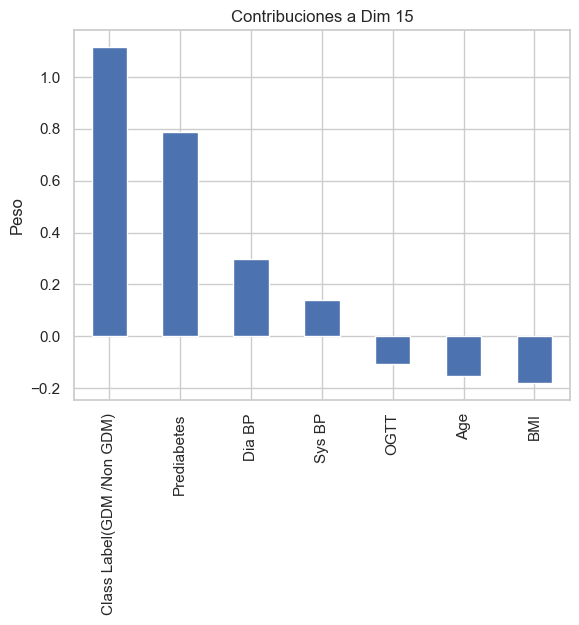

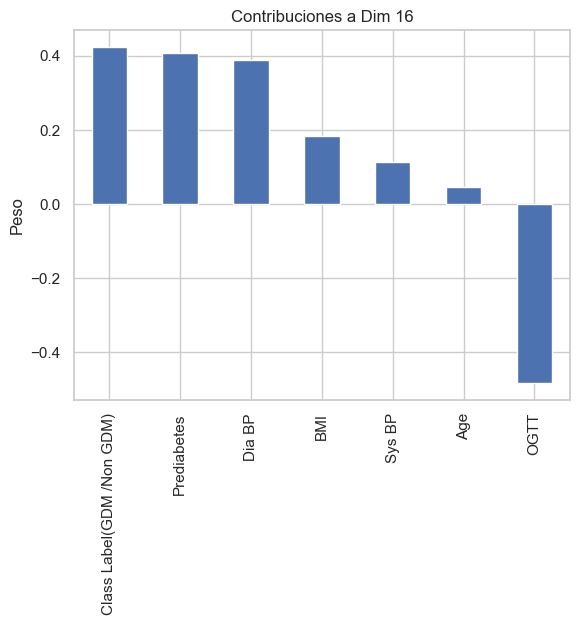

In [671]:
for dim in encoded_weights.columns:
    encoded_weights[dim].sort_values(ascending=False).plot(kind='bar', title=f"Contribuciones a {dim}")
    plt.ylabel("Peso")
    plt.show()

-------------------------------------------------------------

# MODELO SIN PROCESAR ANTED DE SYNTHEA

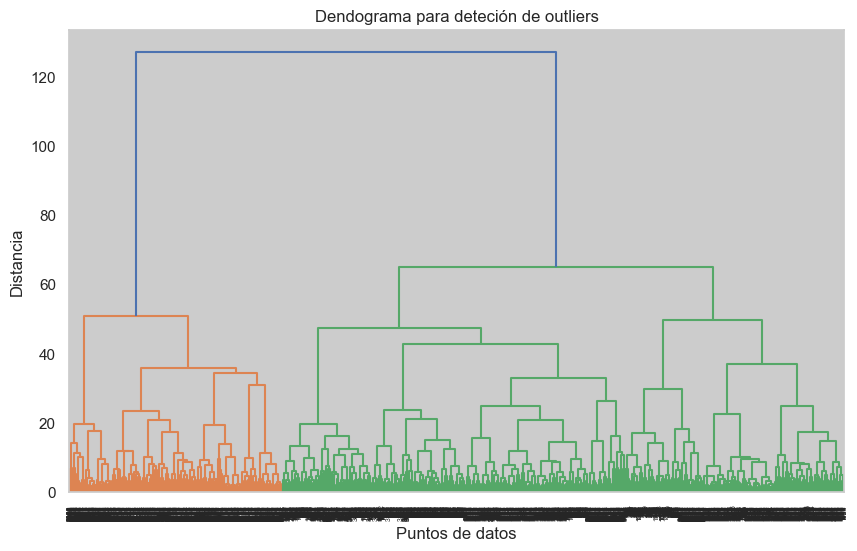

In [496]:
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
Z = linkage(data_scaled, method = 'ward') #método ward minimiza la varianza dentro de los clusters

plt.figure(figsize=(10,6))
dendrogram(Z)
plt.title("Dendograma para deteción de outliers")
plt.xlabel("Puntos de datos")
plt.ylabel("Distancia")
plt.show()



El eje X representa cada punto del dataset, hay tantos como entradas en él. 

El eje Y representa la distancia o similitud entre los clusters. Los puntos que se unen a mayor altura en el dendrograma son más diferentes entre si.

Por ejemplo, los clusters naranja y verde seunen a una altura muy alta, loque indica que son más diferentes entre sí. 
Vamos a definir un umbral para identificar bien los clusters, cortamos el dendrograma a una altura de 30 (entre 20-40 es la altura óptima para no tener clusters o muy pequeños o muy grandes). 

Esto significa que nuestros datos están bien depurados y listos para entrenar el modelo

In [518]:
# Analizar los tamaños de los clusters
cluster_sizes = data_scaled['Cluster'].value_counts()
print(cluster_sizes)

# Relación entre clusters y la etiqueta objetivo
data_scaled['Target'] = data['Class Label(GDM /Non GDM)']  # Añadir la variable objetivo
cluster_analysis = data_scaled.groupby(['Cluster', 'Target']).size().unstack()
print(cluster_analysis)


Cluster
8     497
7     382
6     360
2     344
10    318
11    287
12    282
3     183
1     172
9     151
5     100
4      67
Name: count, dtype: int64
Target       0      1
Cluster              
1          4.0  168.0
2          NaN  344.0
3         12.0  171.0
4          2.0   65.0
5          NaN  100.0
6        342.0   18.0
7        381.0    1.0
8        495.0    2.0
9         26.0  125.0
10       225.0   93.0
11       286.0    1.0
12       281.0    1.0


In [524]:
cluster_stats = data_scaled.groupby('Cluster').mean()
print(cluster_stats)

              Age  No of Pregnancy  Gestation in previous Pregnancy       BMI  \
Cluster                                                                         
1        1.251733        -0.283236                         0.959302  1.385325   
2        0.567668         1.048747                         2.000000  0.551873   
3        0.381703         0.538276                         1.546448  0.401760   
4        1.823374         0.379719                         0.985075  0.006878   
5        1.503790         0.471856                         2.000000  1.164852   
6        0.853234         0.535661                         1.011111  0.025985   
7       -0.005187        -0.904135                         0.327225  0.042233   
8       -0.274609         0.381444                         0.995976 -0.201201   
9        0.144825        -0.363846                         0.953642  0.583554   
10      -1.120403        -0.644135                         0.644654  0.197211   
11      -1.108502        -1.

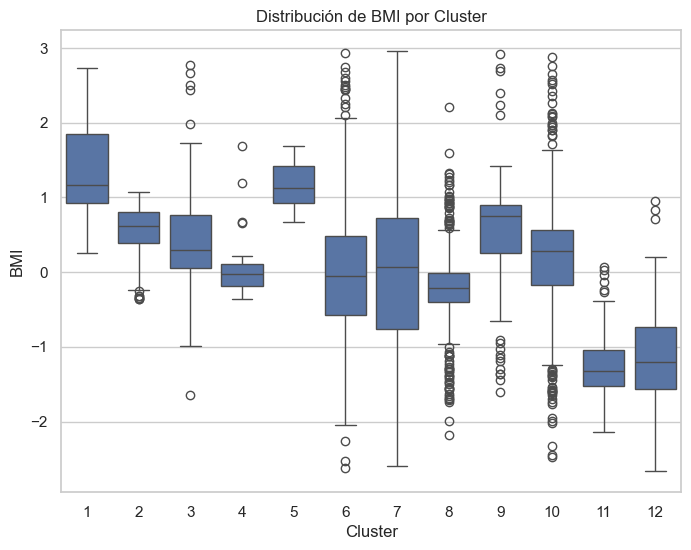

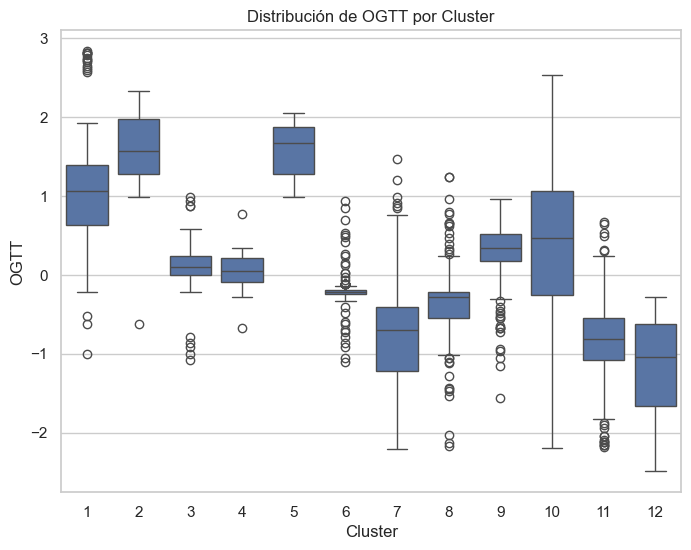

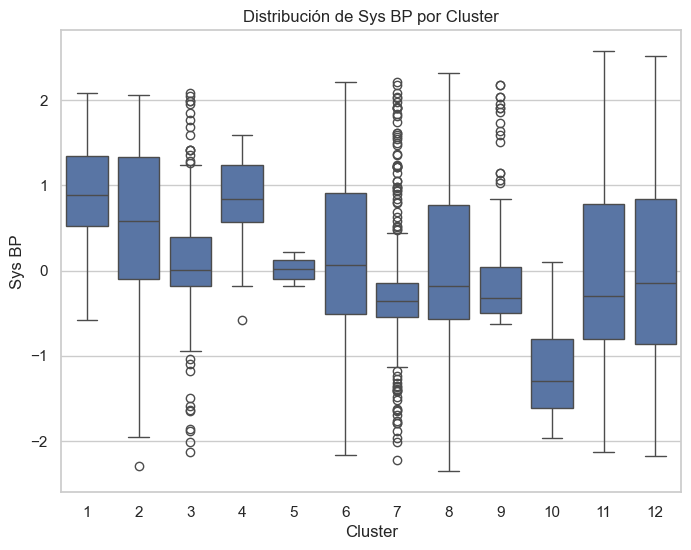

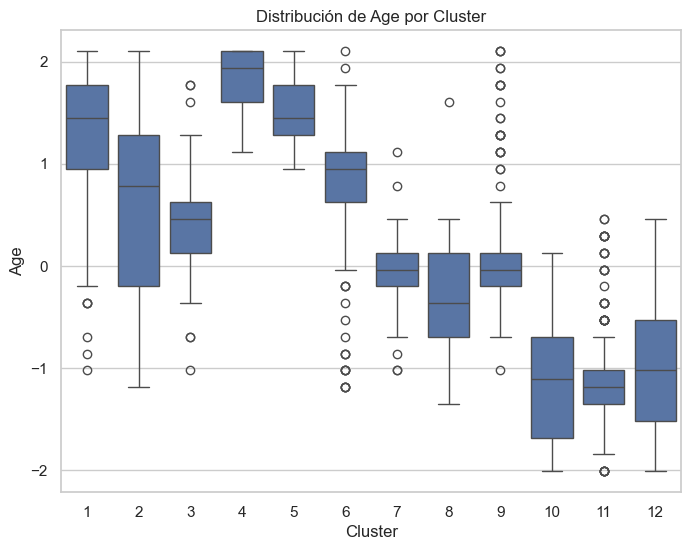

In [526]:

# Variables a analizar
variables = ['BMI', 'OGTT', 'Sys BP', 'Age']

# Crear diagramas de caja para cada variable
for var in variables:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x='Cluster', y=var, data=data_scaled)
    plt.title(f'Distribución de {var} por Cluster')
    plt.show()

El cluster más grande es el cluster 8 y tiene 497 puntos, lo que sugiere que este grupo contiene la mayor parte de las observaciones. 

El cluster más pequeño es el cluster 4, con ´solo 67 puntos, es un grupo mñás específico y diferenciado. 

En cuanto a la relación entre clusters y la variable objetivo, el análsisi relaciona cada cluster con la etiqueta Target : target = 0 representa pacientes no GDM, y Target = 1 representa pacientes con GDM. 
<ul>
    <li>Clusters más asociados a pacientes sin GDM: Cluster 1 (todas son de Target 0), Cluster 2. </li>
    <li> Clusters más asociados a pacientes con GDM: clusters 4, 25 y 29.</li>
    <li> El resto son cluster mixtos.</li>
</ul>

Ahora podemos proceder a implementar el algoritmo. 
Paso 1: Aplicamos un autoencoder apilado, en el paper base usan Deep Stacked Autoencoders (DASE) para reducir la dimensionalidad y 
extraer características relevantes. 
Paso 2: Después de reducir la dimensionalidad con el autoencoder, usaremos un modelo de clasificación y lo entrenaremos. 

**¿ Qué es un Autoencoder apilado ?**

Es una red neuronal utilizada para reducir la dimensionalidad de los datos mientras apende representaciones relevantes. 
Servirá para mejorar la calidad del clasificador final. 

Vamos a reducir la dimensionalidad a las caracteróisticas más importantes del dataset y que hemos descubierto en el análsis: OGTT, Prediabetes, PCOS, Diastolic BP, BMI, HDL, y Hemoglobin. La columna GDM/ Non GDM no se incluye porque esto se desea que sea la salida.  

In [636]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
from keras import layers, losses
from keras.datasets import mnist
from keras.models import Model

In [559]:
#1. Preprocesamiento: dividimos datos en entrenamiento y prueba
X = data_scaled.drop(columns=['Cluster', 'Target'], errors = 'ignore') #variables predictoras
y = data_scaled['Target'] #variable objetivo, class GDM / non GDM

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#2. Construimos autoencoder
input_dim = X_train.shape[1] # Número de características
encoding_dim = 4 #regla dimensionalidad de la miatd de neruonas del nº de features que tenemos.

#Modelo auto encoder:
input_layer = Input(shape=(input_dim, ))
encoded = Dense(16, activation='relu')(input_layer) #primera capa oculta
encoded = Dense(encoding_dim, activation='relu')(encoded) #capa comprimida
decoded = Dense(16, activation='relu')(encoded) #reconstrucción
decoded = Dense(input_dim, activation='sigmoid')(decoded)

#Autoencoder completo
autoencoder = Model(inputs=input_layer, outputs=decoded)
autoencoder.compile(optimizer='adam', loss='mse')

#3. Entrenamos modelo
history = autoencoder.fit(
    X_train, X_train, 
    epochs=50, 
    batch_size=32, 
    validation_split=0.2, 
    verbose = 1
)

#4. Extraer características comprimidas

encoder = Model(inputs=input_layer, outputs=encoded) #Modelo solo de la parte codificada
X_train_encoded= encoder.predict(X_train) #Representaciones comprimidas del conjunto de entrenamiento
X_test_encoded = encoder.predict(X_test) #Representaciones comprimidas del conjunto de prueba

#5. entrenar clasificador con las características reducidas
classifier = RandomForestClassifier(random_state=42)
classifier.fit(X_train_encoded, y_train)

#Prediccion y evaluacion
y_pred = classifier.predict(X_test_encoded)
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Epoch 1/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.7651 - val_loss: 0.7239
Epoch 2/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.6984 - val_loss: 0.6132
Epoch 3/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.5891 - val_loss: 0.5317
Epoch 4/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.5168 - val_loss: 0.5026
Epoch 5/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.4934 - val_loss: 0.4907
Epoch 6/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.4814 - val_loss: 0.4820
Epoch 7/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.4686 - val_loss: 0.4745
Epoch 8/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.4687 - val_loss: 0.4663
Epoch 9/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.4661 - val_loss: 0.4587
Epoch 10/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.4452 - val_loss: 0.4523
Epoch 11/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.4520 - val_loss: 0.4465
Epoch 12/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.4454 - val_lo

**Validamos matriz de confusion**

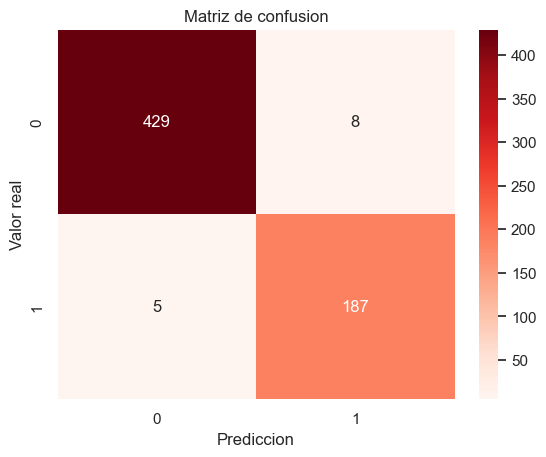

In [564]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt= 'd', cmap='Reds')
plt.xlabel('Prediccion')
plt.ylabel('Valor real')
plt.title('Matriz de confusion')
plt.show()

La matriz de confusión indica que el modelo tiene pocos errores, tanto  falsos positivos como falsos negativos. 

Evaluamos la Generalización con validación cruzada. 


In [569]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(classifier, X_train_encoded, y_train, cv=5)
print(f"Cross-validation scores: {scores}")
print(f"Mean accuracy: {scores.mean()}")

Cross-validation scores: [0.96421471 0.97415507 0.97813121 0.98409543 0.96613546]
Mean accuracy: 0.9733463759277008


Como podemos observar el modelo generaliza bien, tenemos unvalor bastante alto. 

**Analizamos características comprimidas generadas**


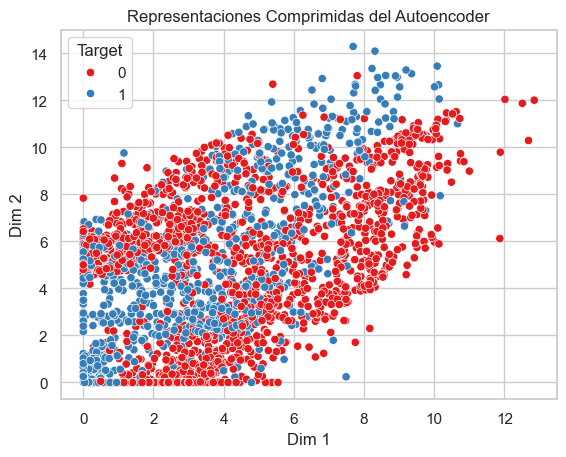

In [575]:
sns.scatterplot(x=X_train_encoded[:,0], y=X_train_encoded[:,1], hue=y_train, palette='Set1')
plt.title('Representaciones Comprimidas del Autoencoder')
plt.xlabel('Dim 1')
plt.ylabel('Dim 2')
plt.show()

Este gráfico muestra la representación comprimida de los datos obtenidade la capa comprimida del autoencoder, 
usa dos dimensiones principales (Dim1, Dim2). Los puntos están coloreados según el target:
<ul>
    <li>Rojo: casos de GDM.</li>
    <li>Azul: casos de Non GDM.</li>
</ul> 
<ul>Conclusiones:
    <li>Clases superpuestas: aunque hay cierta separación de clases, en la dimensión 1 y la 2 comparten muchas características ypor tanto no es trivial separarlos.</li>
    <li>La mayor concentración de puntos se encuentran en la spartes medias del gráfico.</li>
    <li>Clases GDM: paece haber mayor presencia de cassos 1 en la parte superior y derechadel gráfico, pudiendo indicar que estas regiones están asociadas con características que el autoencoder ha aprendido como relevantes para identificar GDM.</li>
    <li>Clases non GDM: estos casos están más dispersos, aunque hay uno que esta en la zona central , queriendo decir que hay un grupode pacientes sin GDM con caraterísticas bien definidas.</li>
</ul>

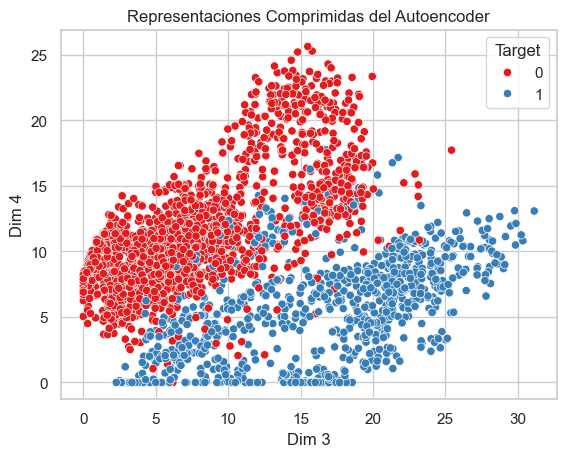

In [582]:
sns.scatterplot(x=X_train_encoded[:,2], y=X_train_encoded[:,3], hue=y_train, palette='Set1')
plt.title('Representaciones Comprimidas del Autoencoder')
plt.xlabel('Dim 3')
plt.ylabel('Dim 4')
plt.show()

<ul>
    <li>Rojo: casos de GDM.</li>
    <li>Azul: casos de Non GDM.</li>
</ul> 
<ul>Conclusiones:
    <li>Separación de clases:Aunquehay una pequeña parte de la región central que se solapan, esto muestra que estas dimensiones también capturan que puedehaber algunos que se hayan clasificado erróneamente.</li>
    <li>La mayor concentración de puntos se encuentran en la spartes medias del gráfico.</li>
</ul>

In [593]:
encoded_layer_weights = autoencoder.layers[1].get_weights()[0]
encoded_weights = pd.DataFrame(
    encoded_layer_weights, 
    index=X.columns,
    columns=[f"Dim {i+1}" for i in range(encoded_layer_weights.shape[1])]
)
print(encoded_weights)

                                    Dim 1     Dim 2     Dim 3     Dim 4  \
Age                             -0.156026 -0.001680 -0.415938  0.159934   
No of Pregnancy                 -0.679549 -0.269895 -0.066308 -0.678020   
Gestation in previous Pregnancy  0.558138  0.380360  0.091530  0.206230   
BMI                              0.041054 -0.007490 -0.114225 -0.305951   
HDL                             -0.810137  0.016394 -0.594226  0.148063   
Family History                   1.233976  1.382627  1.186787  0.379445   
unexplained prenetal loss        0.767414 -0.114868  0.624613  0.245339   
Large Child or Birth Default     0.333089  0.458172 -0.014510 -0.693880   
PCOS                            -0.988188  0.398224 -0.838008 -0.502526   
Sys BP                          -0.154471  0.136722  0.025984 -0.100753   
Dia BP                           0.054042  0.257661  0.268350 -0.158706   
OGTT                            -0.236285  0.435422 -0.121848  0.374526   
Hemoglobin               

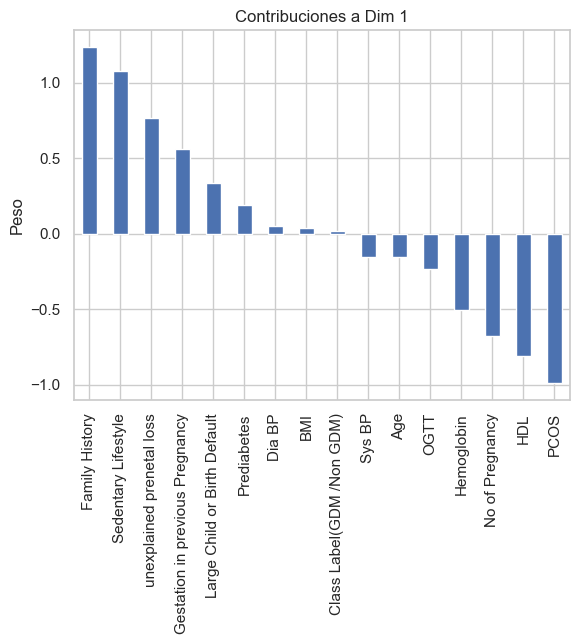

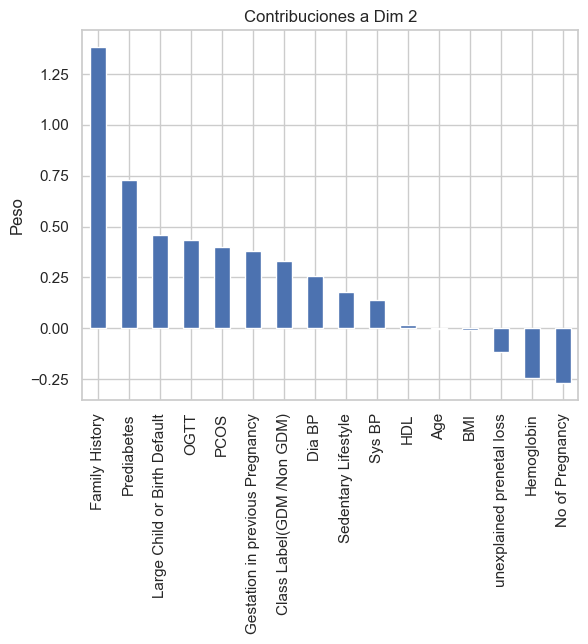

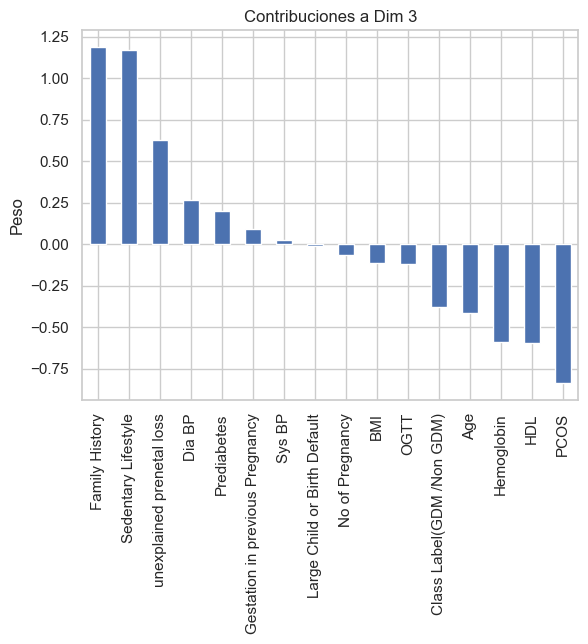

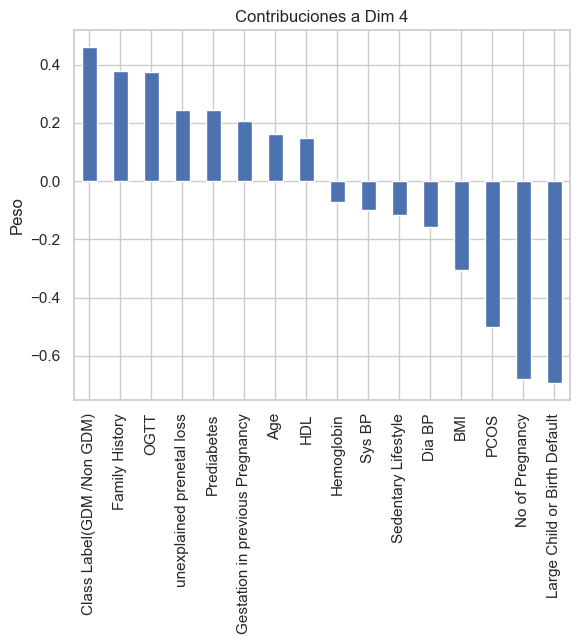

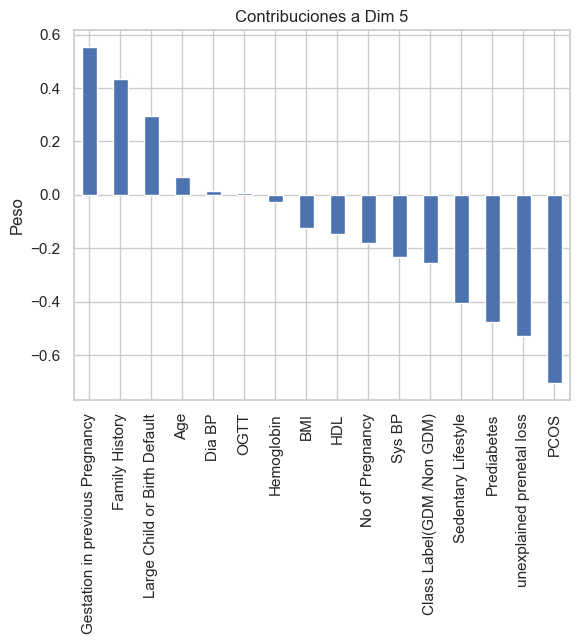

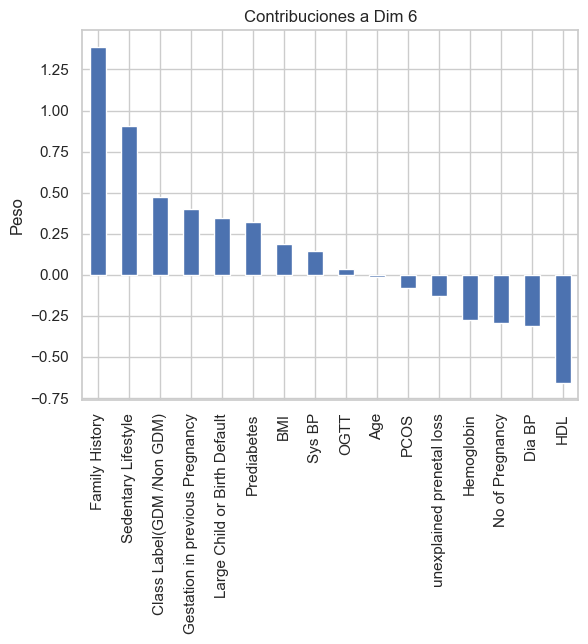

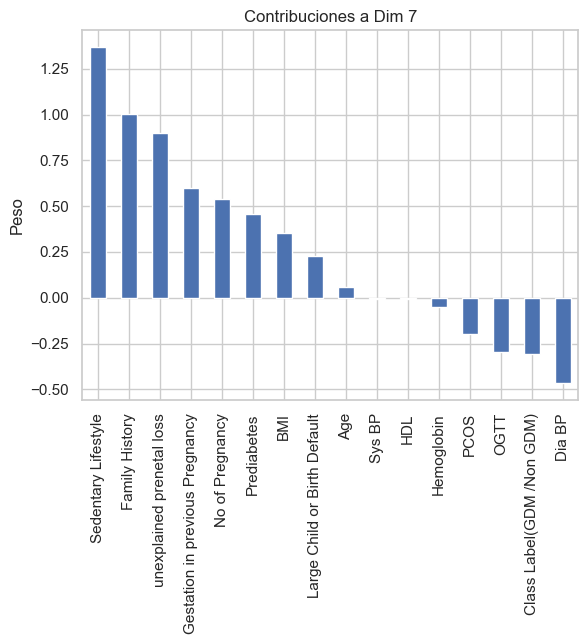

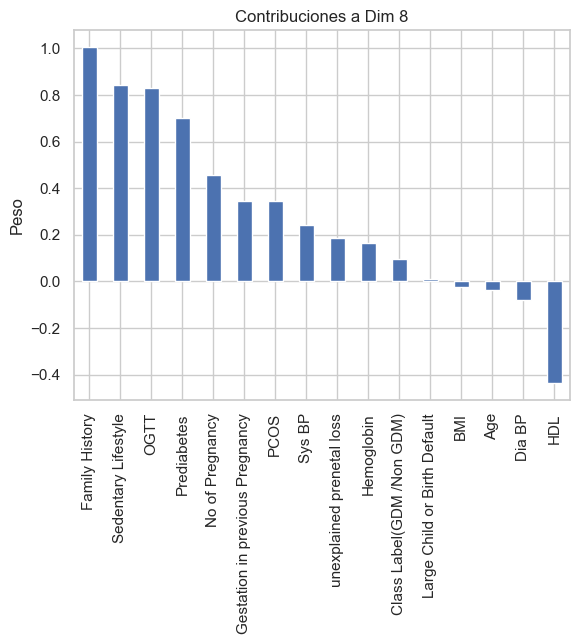

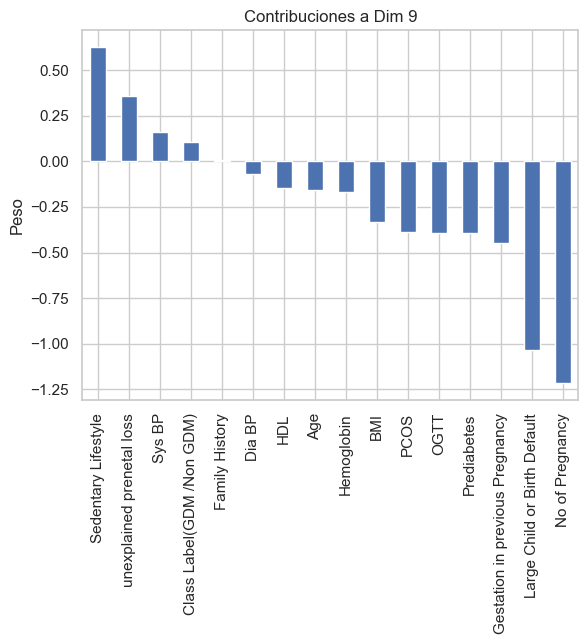

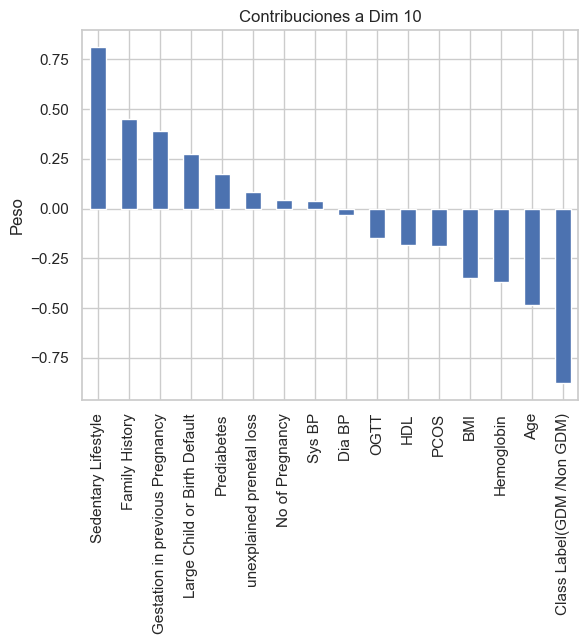

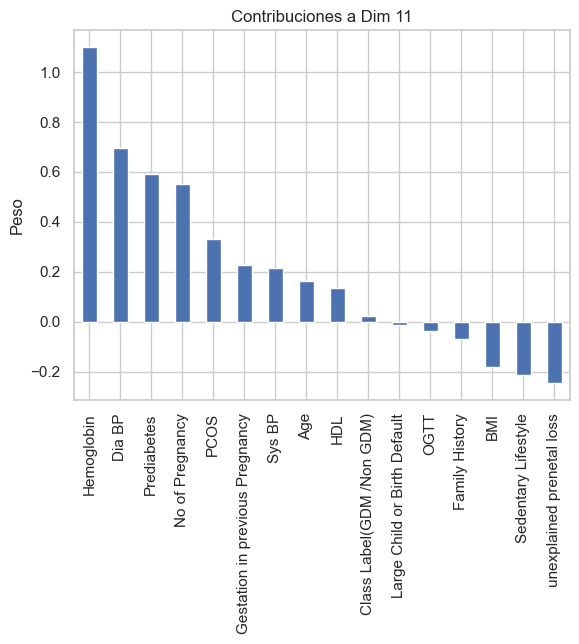

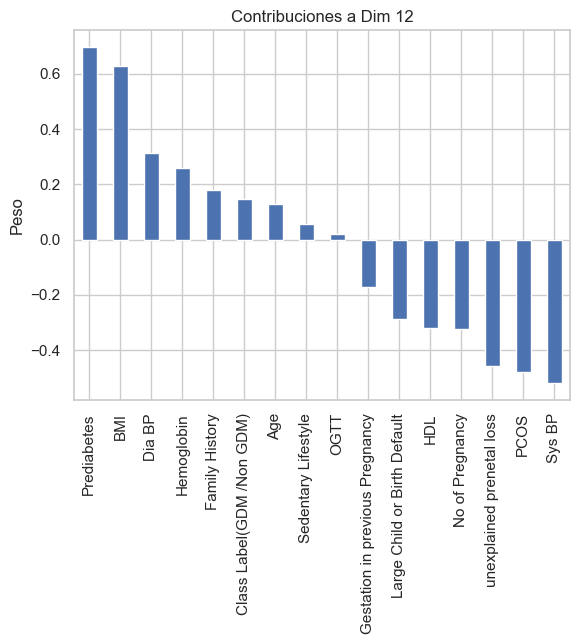

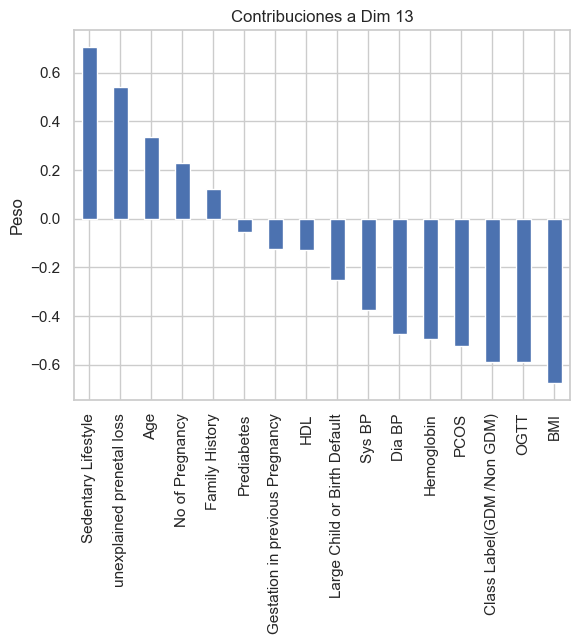

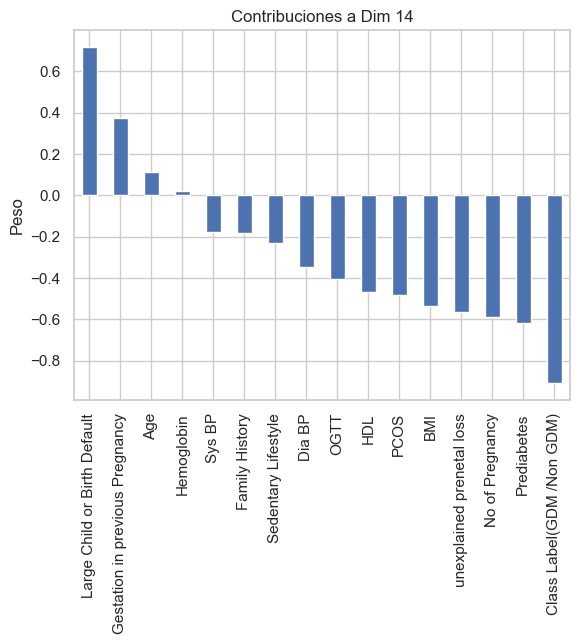

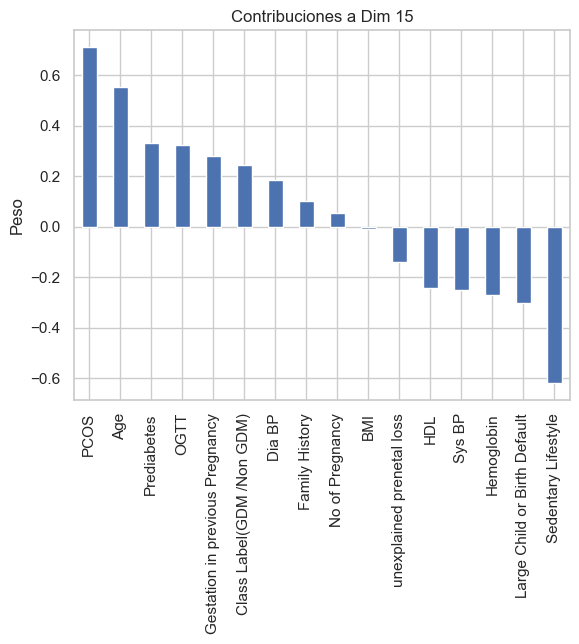

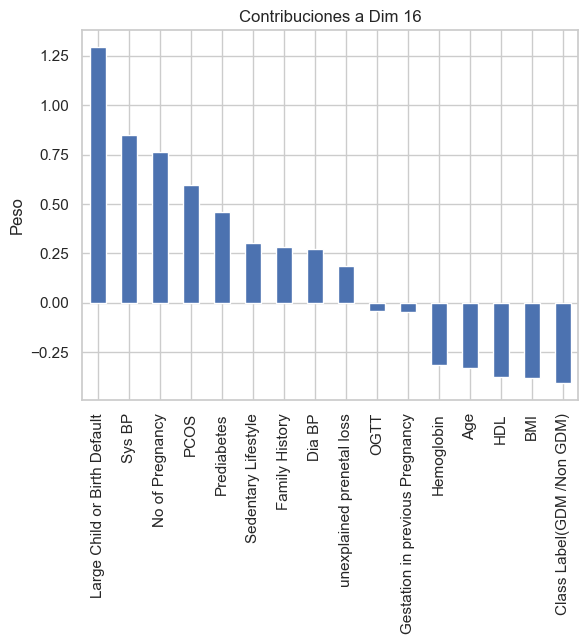

In [599]:
for dim in encoded_weights.columns:
    encoded_weights[dim].sort_values(ascending=False).plot(kind='bar', title=f"Contribuciones a {dim}")
    plt.ylabel("Peso")
    plt.show()

**Patrones Observados**

<ul>Dimensiones que capturan patrones específicos:
    <li>Dim 1 y Dim 2 están domindas por características relaciondads con el historial clínico (Family History, Sedentary Lifestyle y Prediabetes y por eso las dimensioes salían superpuestas.</li>
    <li>Dimensiones como Dim 4 capturan más patrones específicos  de características como  Large Child o Biryh Default.</li>
</ul>